## Project Description:Twitter US Airline SentimentData 
* Description:A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### Dataset: 
* The project is from a dataset from Kaggle.Link to the Kaggle project site:https://www.kaggle.com/crowdflower/twitter-airline-sentimentThe dataset has to be downloaded from the above Kagglewebsite.The dataset has the following 

#### Objective:
* To implement the techniques learnt as a part of the course.

git repo: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-bunty-sunbird/tree/master/project/NLP-Airline-Sentiment-Analysis

- [Import the libraries, load dataset, print shape of data, data description.](#1)
- [Understand of data-columns:](#2)
    - [Drop all other columns except “text”and “airline_sentiment”.](#2.1)
    - [Check the shape of data.](#2.2)
    - [Print first 5 rows of data](#2.3)
- [Text pre-processing:Data preparation.](#3)
    - a. Html tag removal. 
    - b.Tokenization. 
    - c.Remove the numbers. 
    - d.Removal of Special Characters and Punctuations. 
    - e.Conversion to lowercase. 
    - f.Lemmatize or stemming. 
    - g.Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.) h.Print first 5 rows of data after pre-processing.
- [Vectorization:](#4)
    - [Use CountVectorizer.](#4.1)
    - [Use TfidfVectorizer.](#4.2)
- [Fit and evaluate modelusing both type of vectorization.(6+6Marks)](#5)
- [Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset.](#6)

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Importing the libraries and loading the data<a class="anchor" id='1'></a>

In [2]:
# !pip install mlxtend

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from lightgbm import LGBMClassifier
from sklearn.preprocessing import Normalizer
from lightgbm import LGBMClassifier


In [4]:
df= pd.read_csv("Tweets.csv")
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [5]:
pd.set_option('display.max_colwidth', None) # It will enable the entire row visible with truncation of the text. (We can see full text.)
df.loc[[0]]

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                           1.0   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   

  airline_sentiment_gold     name negativereason_gold  retweet_count  \
0                    NaN  cairdin                 NaN              0   

                                  text tweet_coord              tweet_created  \
0  @VirginAmerica What @dhepburn said.         NaN  2015-02-24 11:35:52 -0800   

  tweet_location               user_timezone  
0            NaN  Eastern Time (US & Canada)

In [6]:
print("Shape of the dataframe is",df.shape, "\n")
print("The number of nulls in each column are: \n",df.isna().sum())

Shape of the dataframe is (14640, 15) 

The number of nulls in each column are: 
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


### EDA: Understanding the data columns<a class="anchor" id='2'></a>

In [7]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

* tweet_coord , airline_sentiment_gold, negativereason_gold have more than 90% missing data. It will be better to delete these columns as they will not provide any constructive information.

In [8]:
df.describe()

tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000

#### Airline sentiments for each airline

* Firstly lets calculate the total number of tweets for each airline
* Then, we are going to get the barplots for each airline with respect to sentiments of tweets (positive,negative or neutral).
* This will give us a clearer idea about the airline sentiments , airlines relationship.

In [9]:
df.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


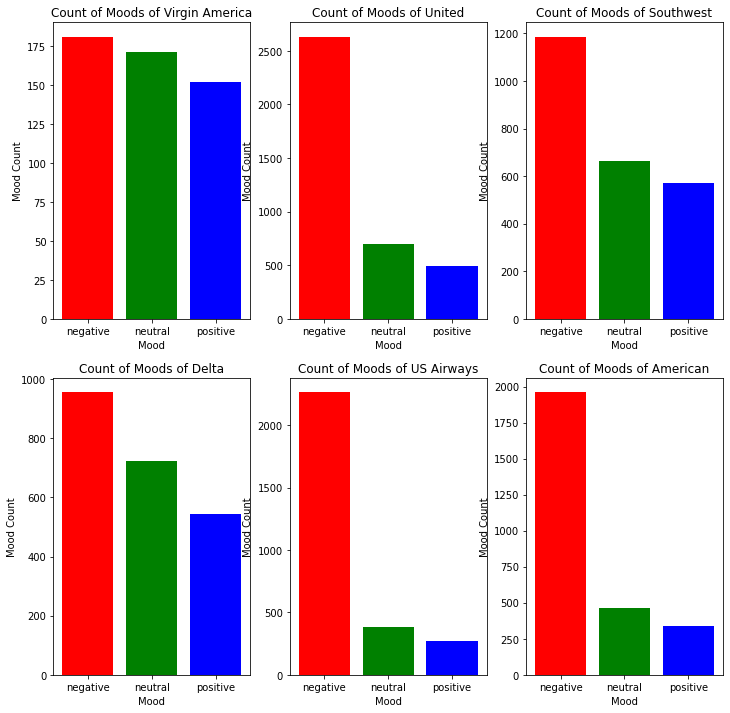

In [10]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
# airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
airlines = df.airline.unique().tolist()
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

* United, US Airways, American substantially get negative reactions.
* Tweets for Virgin America are the most balanced.

#### Most used words in Positive and Negative tweets

In [11]:
# pip install wordcloud

In [12]:
from wordcloud import WordCloud,STOPWORDS

* The goal is to firstly get an idea of the most frequent words in negative tweets.
* Get idea about most frequent words in positive tweets.

#### Wordcloud for Negative sentiments of tweets

* Wordcloud is a great tool for visualizing nlp data. The larger the words in the wordcloud image , the more is the frequency of that word in our text data.

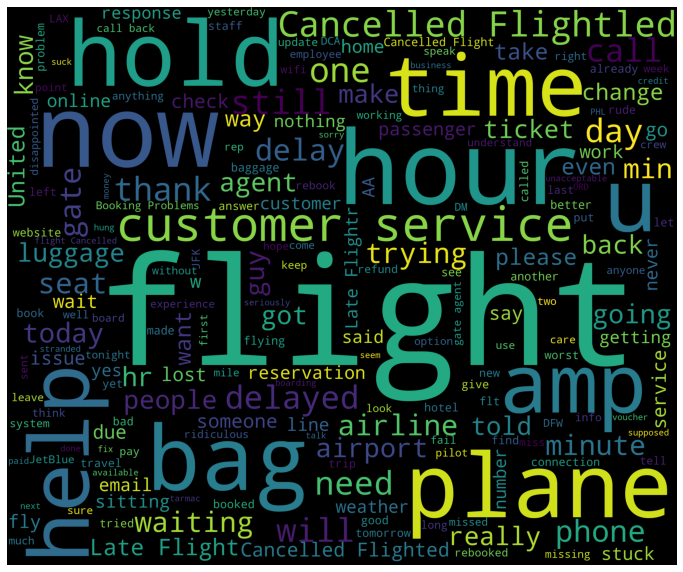

In [13]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Wordcloud for positive reasons

* The code for getting positive sentiments is completely same with the one for negative sentiments. Just replace negative with positive in the first line. Easy, right!

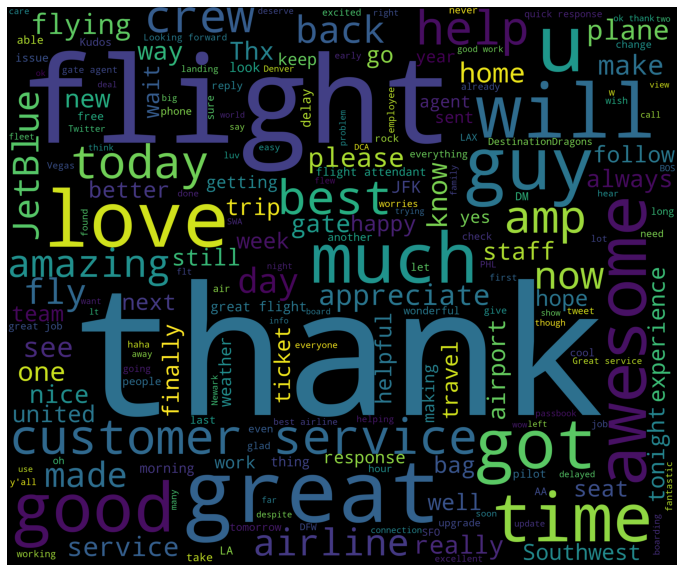

In [14]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Lets try and calculate the highest frequency words in postive sentimental tweets¶


In [15]:
# Calculate highest frequency words in positive tweets
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
        if(str.count(str2[i])>50): 
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))
        
print(freq(cleaned_word))

Frequency of to is : 923
Frequency of the is : 924
Frequency of time is : 59
Frequency of I is : 574
Frequency of fly is : 54
Frequency of this is : 143
Frequency of :) is : 96
Frequency of it is : 166
Frequency of was is : 226
Frequency of and is : 416
Frequency of an is : 74
Frequency of good is : 75
Frequency of so is : 163
Frequency of much is : 54
Frequency of is is : 219
Frequency of a is : 501
Frequency of great is : 144
Frequency of my is : 320
Frequency of &amp; is : 77
Frequency of on is : 327
Frequency of I'm is : 67
Frequency of flying is : 59
Frequency of your is : 212
Frequency of all is : 92
Frequency of from is : 124
Frequency of Thanks! is : 69
Frequency of for is : 658
Frequency of flight is : 263
Frequency of but is : 91
Frequency of you is : 509
Frequency of would is : 56
Frequency of be is : 135
Frequency of with is : 195
Frequency of you. is : 77
Frequency of love is : 85
Frequency of You is : 62
Frequency of are is : 120
Frequency of of is : 236
Frequency of that

* Words like "Thanks", "best", "customer", "love", "flying", "good" are understandably present in the most frequent words of positive tweets.
* However, other than these, most of the words are stop words and need to be filtered. We will do so later.
* Lets try and visualize the reasons for negative tweets first !!

#### What are the reasons for negative sentimental tweets for each airline ?

* We will explore the negative reason column of our dataframe to extract conclusions about negative sentiments in the tweets by the customers

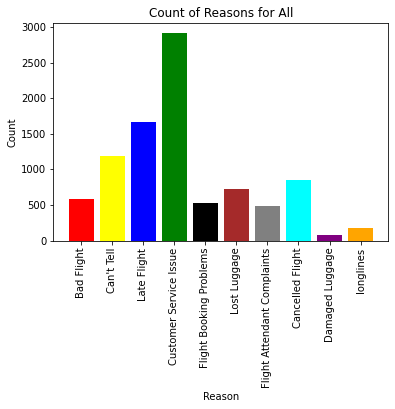

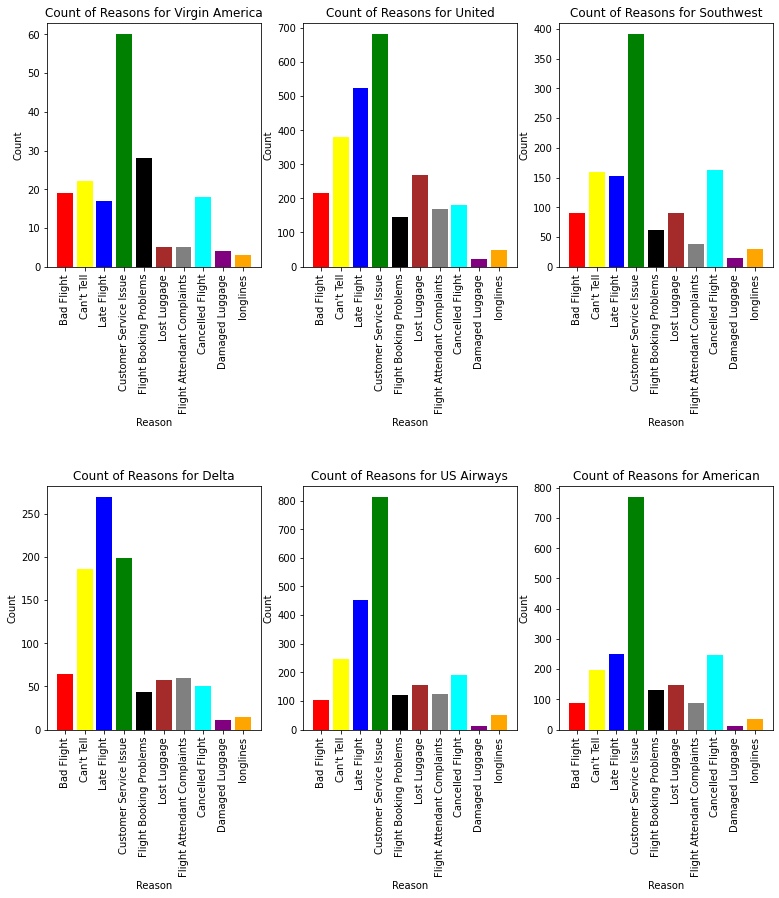

In [16]:
#get the number of negative reasons
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))

def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

* Customer Service Issue is the main neagtive reason for US Airways,United,American,Southwest,Virgin America
* Late Flight is the main negative reason for Delta
* Interestingly, Virgin America has the least count of negative reasons (all less than 60)
* Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons (Late flight, Customer Service Issue)


#### Is there a relationship between negative sentiments and date ?

* Our dataframe has data from 2015-02-17 to 2015-02-24

* It will be interesting to see if the date has any effect on the sentiments of the tweets(especially negative !). We can draw various coclusions by visualizing this.

In [17]:
date = df.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

* This shows the sentiments of tweets for each date from 2015-02-17 to 2015-02-24 for every airline in our dataframe.

* Our next step will be to plot this and get better visualization for negative tweets.

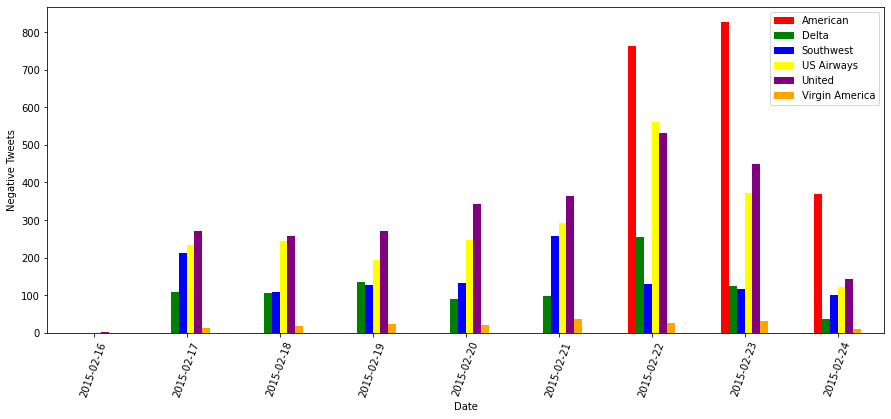

In [18]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

* Interestingly, American has a sudden upsurge in negative sentimental tweets on 2015-02-23, which reduced to half the very next day 2015-02-24. (I hope American is doing better these days and resolved their Customer Service Issue as we saw before)
* Virgin America has the least number of negative tweets throughout the weekly data that we have. It should be noted that the total number of tweets for Virgin America was also significantly less as compared to the rest airlines, and hence the least negative tweets.
* The negative tweets for all the rest airlines is slightly skewed towards the end of the week !

### Data Preprocessing: Preprocessing the tweet text data

* Now, we will clean the tweet text data and apply classification algorithms on it

### Text pre-processing:Data preparation

#### Drop all other columns except “text”and “airline_sentiment”.<a class="anchor" id='2.1'></a>

In [19]:
df = df[['text', 'airline_sentiment']]

#### Check the shape of data.<a class="anchor" id='2.2'></a>

In [20]:
print("Shape of the dataframe is",df.shape, "\n")

Shape of the dataframe is (14640, 2) 



#### Print first 5 rows of data<a class="anchor" id='2.3'></a>

In [21]:
df.head(5)

text  \
0                                                                                             @VirginAmerica What @dhepburn said.   
1                                                        @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                         @VirginAmerica I didn't today... Must mean I need to take another trip!   
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                         @VirginAmerica and it's a really big bad thing about it   

  airline_sentiment  
0           neutral  
1          positive  
2           neutral  
3          negative  
4          negative

### Text pre-processing: Data preparation.<a class="anchor" id='3'></a>

* Now, we will clean the tweet text data and apply classification algorithms on it

In [22]:
# 
# Function to remove the contractions
# 

import contractions

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

In [23]:
# 
# update the stopwords to not have 'not', 'no' to keep these critical words that effects the meaning of the sentiments
# also add word 'pep' for the same reason
#

from nltk.corpus import stopwords

stopword_list = nltk.corpus.stopwords.words('english')

stopword_list.remove('no')
stopword_list.remove('not')
stopword_list.append('pep')

print (stopwords.words("english")) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
#
# function to remove accented characters
# 

import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


In [25]:
# 
# function to remove special characters and optionally digits
#

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


In [26]:
# 
# collection of functions that performs pre-processing on the tweet
# 1. Remove HTML tags using 'BeautifulSoup'
# 2. Tokenize using 'NLTK'
# 3. Replace contractions using 'contractions' library
# 4. Remove accented characters using unicodedata library
# 5. Remove special characters and digits using regex
# 6. convert all letters to lowercase
# 7. Remove stopwords
# 8. join the tokenized words to make it a text again
# 
# On this cleaned data we will perform stemming and lemmatization
# 


from bs4 import BeautifulSoup

def tweet_to_words( raw_review ):
    
    #
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    
    #
    # 1. Remove HTML
    #
    review_text = BeautifulSoup(raw_review).get_text() 
    
    #
    # 2. Tokenize
    #
    words = nltk.word_tokenize(review_text)
    
    #
    # 3. Replace contractions
    #
    review_text = replace_contractions(review_text)
    
    #
    # 4. Remove accented characters
    #
    review_text = remove_accented_chars(review_text)
    
    #
    # 5. Remove non-letters (special characters)
    # letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    letters_only = remove_special_characters(review_text, remove_digits = True)
    
    #
    # 6. Convert to lower case, split into individual words
    #
    words = letters_only.lower().split()                             
    
    #
    # 7. Remove stop words
    #     In Python, searching a set is much faster than searching
    #     a list, so convert the stop words to a set
    stops = stopwords.words("english")
    stops.remove('no')
    stops.remove('not')
    stops.append('pep')
    stops = set(stops)
    meaningful_words = [w for w in words if not w in stops]   

    #
    # 8. Join the words back into one string separated by space, 
    # and return the result.
    #
    return( " ".join( meaningful_words ))  

In [27]:
# 
# clean the 'text' column in a new column 'clean_tweet'
#

df['clean_tweet'] = df['text'].apply(lambda x: tweet_to_words(x))

In [28]:
# 
# check the cleaned tweet in 'clean_tweet'
# 

df.head(5)

text  \
0                                                                                             @VirginAmerica What @dhepburn said.   
1                                                        @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                         @VirginAmerica I didn't today... Must mean I need to take another trip!   
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                         @VirginAmerica and it's a really big bad thing about it   

  airline_sentiment  \
0           neutral   
1          positive   
2           neutral   
3          negative   
4          negative   

                                                                                  clean_tweet  
0                                                                 virginamerica dhepburn said  
1                                       virginamerica plus added commercials experience tacky  
2                                    virginamerica not today must mean need take another trip  
3  virginamerica really aggressive blast obnoxious entertainment guests faces little recourse  
4                                                          virginamerica really big bad thing

### Stemming:

- Stemming is the process of reducing inflection in words (e.g. running, runs) to their root form (e.g. run). The “root” in this case may not be a real root word, but just a canonical form of the original word.

In [29]:
#
# Functions to perform stemming
#

from nltk.stem import LancasterStemmer, WordNetLemmatizer

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text


### Lemmatization:

- Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form.
- The only difference is that, lemmatization tries to do it the proper way.
- It doesn’t just chop things off, it actually transforms words to the actual root. For example, the word “better” would map to “good”.

In [30]:
#
# Functions to perform lemmatization
#


def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

import spacy
nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
def lemmatize_text(text):
    text = nlp(text) # encode to spacy format
    # -PRON- => proper noun
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text


In [31]:
# 
# Have a single function to perform stemming and lemmatization
# 

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas

def simple_stem_and_lemmatize(words):
    stems = simple_stemmer(words)
    lemmas = lemmatize_text(words)
    return stems, lemmas

In [32]:
#
# Create columns for stemmed and lemmatized text. Stemming and Lemmatization are performed over the 'clean_tweet' text
# 

df['lemma'] = ''
df['stem'] = ''

for i, row in df.iterrows():
    words = df.at[i, 'clean_tweet']
    # stems, lemmas = stem_and_lemmatize(words)
    stems, lemmas = simple_stem_and_lemmatize(words)
    df.at[i,'stem'] = stems
    df.at[i, 'lemma'] = lemmas

#
# check the stemmed and lemmatized text
#   
df.head()

text  \
0                                                                                             @VirginAmerica What @dhepburn said.   
1                                                        @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                         @VirginAmerica I didn't today... Must mean I need to take another trip!   
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                         @VirginAmerica and it's a really big bad thing about it   

  airline_sentiment  \
0           neutral   
1          positive   
2           neutral   
3          negative   
4          negative   

                                                                                  clean_tweet  \
0                                                                 virginamerica dhepburn said   
1                                       virginamerica plus added commercials experience tacky   
2                                    virginamerica not today must mean need take another trip   
3  virginamerica really aggressive blast obnoxious entertainment guests faces little recourse   
4                                                          virginamerica really big bad thing   

                                                                                      lemma  \
0                                                                virginamerica dhepburn say   
1                                        virginamerica plus add commercial experience tacky   
2                                  virginamerica not today must mean need take another trip   
3  virginamerica really aggressive blast obnoxious entertainment guest face little recourse   
4                                                        virginamerica really big bad thing   

                                                                           stem  
0                                                   virginamerica dhepburn said  
1                                    virginamerica plu ad commerci experi tacki  
2                        virginamerica not today must mean need take anoth trip  
3  virginamerica realli aggress blast obnoxi entertain guest face littl recours  
4                                            virginamerica realli big bad thing

In [33]:
#
# The data is split in the standard 80,20 ratio
# 

train,test = train_test_split(df,test_size=0.2,random_state=42, stratify=df.airline_sentiment) 

### Vectorization.<a class="anchor" id='4'></a>

### Use the 'stem' and 'lemma' columns (pre-processed text) for DTM generation

* Since the EDA is complete, use columns “text”and “airline_sentiment” from here on

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### Fit the models using count and TF-IDF vectorization DTM.<a class="anchor" id='5'></a>

* These data were generated on the cleaned and stemmed data

In [35]:
df_result_mod_train = pd.DataFrame({'Classifier':[],'processed_data':[],'Vectorizer':[], 'Accuracy':[]})
ind = 0

In [56]:
Classifiers = [
    #LGBMClassifier(n_jobs=-1),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_jobs=-1,n_estimators=2000), 
    GradientBoostingClassifier(n_estimators=2000),
    LogisticRegression(max_iter=500),
    SVC(),
    KNeighborsClassifier(n_neighbors=3),
    AdaBoostClassifier(),
    GaussianNB()]

In [37]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

def visClassifierResults(model_w_parameters, X_train, y_train, X_test, y_test):
    viz = ClassificationReport(model_w_parameters)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

    roc = ROCAUC(model_w_parameters)
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc.show()

In [38]:
def get_classification_report(y_test, y_pred):

    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    
    return df_classification_report

In [39]:

def fit_classifier(train_data, test_data, col_name, vectorizer_name):
    global ind
    dense_features=train_data.toarray()
    dense_test= test_data.toarray()
    Accuracy=[]
    Model=[]
    for classifier in Classifiers:
        try:
            fit = classifier.fit(train_data,train['airline_sentiment'])
            pred = fit.predict(test_data)
        except Exception:
            fit = classifier.fit(dense_features,train['airline_sentiment'])
            pred = fit.predict(dense_test)
        accuracy = accuracy_score(pred,test['airline_sentiment'])
        Accuracy.append(accuracy)
        Model.append(classifier.__class__.__name__)
        print(classifier.__class__.__name__+' on cleaned '+col_name+' text with vectorizer: '+vectorizer_name)
        print('==============================================================================================')
        print('Accuracy of '+classifier.__class__.__name__+' on cleaned '+col_name+' text with vectorizer: '+vectorizer_name+' is '+str(accuracy))
        
        
        report = classification_report(pred,test['airline_sentiment'])
        print(report)

        df_result_mod_train.loc[ind] = [classifier.__class__.__name__,
                                        col_name,
                                        vectorizer_name,
                                        accuracy]
        ind = ind + 1

        
        cm=confusion_matrix(pred , test['airline_sentiment'])
        plt.figure()
        plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
        plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
        plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
        plt.show()
        
        visClassifierResults(classifier, dense_features, train['airline_sentiment'], dense_test, test['airline_sentiment'])
        

#### Use CountVectorizer and TfIdf Vectorizer <a class="anchor" id='4.1'></a><a class="anchor" id='4.2'></a>

In [40]:
def process_column(col):
    train_clean_tweet=[]
    for tweet in train[col]:
        train_clean_tweet.append(tweet)
    
    test_clean_tweet=[]
    for tweet in test[col]:
        test_clean_tweet.append(tweet)

    print ("Creating CountVectorized bag of words...\n")
    v_cv = CountVectorizer(analyzer = "word")

    train_features_cv = v_cv.fit_transform(train_clean_tweet)
    test_features_cv = v_cv.transform(test_clean_tweet)
    
    #norm_cv = Normalizer()
    #train_features_cv = norm_cv.fit_transform(train_features_cv)
    #test_features_cv = norm_cv.fit_transform(test_features_cv)

    print("CountVectorized shape: ", train_features_cv.shape)
    
    # Fit the DTM generated using CountVectorizer
    fit_classifier(train_features_cv, test_features_cv, col, 'CountVectorized')

    v_tfidf = TfidfVectorizer()

    # tokenize and build vocab
    train_features_tfidf = v_tfidf.fit_transform(train_clean_tweet)
    test_features_tfidf = v_tfidf.transform(test_clean_tweet)

    #norm_tdf = Normalizer()
    #train_features_tfidf = norm_cv.fit_transform(train_features_tfidf)
    #test_features_tfidf = norm_cv.fit_transform(test_features_tfidf)
    
    print("TfIDF shape: ", test_features_tfidf.shape)
    
    # Fit the DTM generated using TF-IDF
    fit_classifier(train_features_tfidf, test_features_tfidf, col, 'TfidfVectorizer')

Creating CountVectorized bag of words...

CountVectorized shape:  (11712, 10100)
DecisionTreeClassifier on cleaned stem text with vectorizer: CountVectorized
Accuracy of DecisionTreeClassifier on cleaned stem text with vectorizer: CountVectorized is 0.7223360655737705
              precision    recall  f1-score   support

    negative       0.84      0.82      0.83      1885
     neutral       0.48      0.50      0.49       593
    positive       0.58      0.61      0.60       450

    accuracy                           0.72      2928
   macro avg       0.63      0.64      0.64      2928
weighted avg       0.73      0.72      0.72      2928



<Figure size 576x396 with 0 Axes>

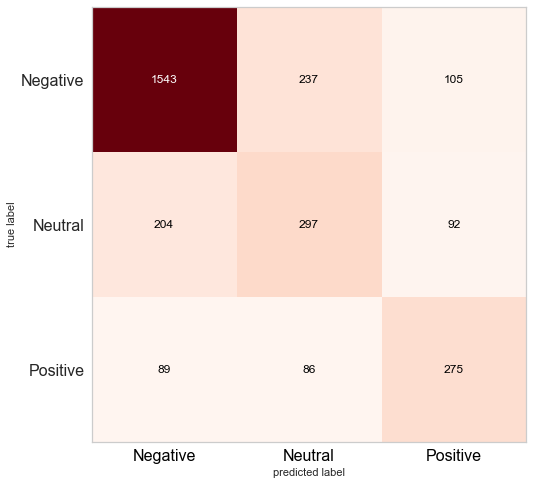

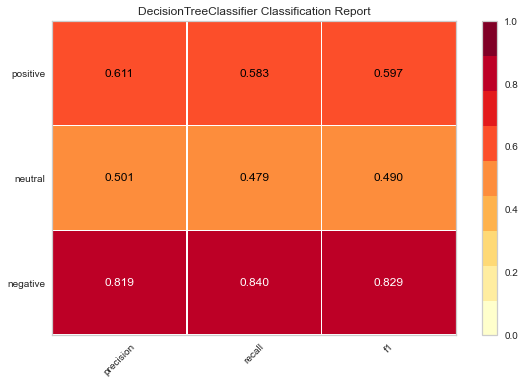

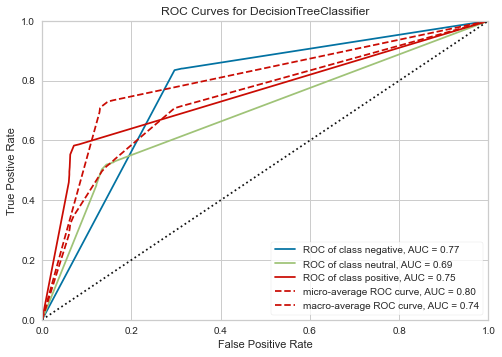

RandomForestClassifier on cleaned stem text with vectorizer: CountVectorized
Accuracy of RandomForestClassifier on cleaned stem text with vectorizer: CountVectorized is 0.7909836065573771
              precision    recall  f1-score   support

    negative       0.93      0.83      0.87      2050
     neutral       0.56      0.65      0.60       531
    positive       0.57      0.78      0.66       347

    accuracy                           0.79      2928
   macro avg       0.69      0.75      0.71      2928
weighted avg       0.82      0.79      0.80      2928



<Figure size 576x396 with 0 Axes>

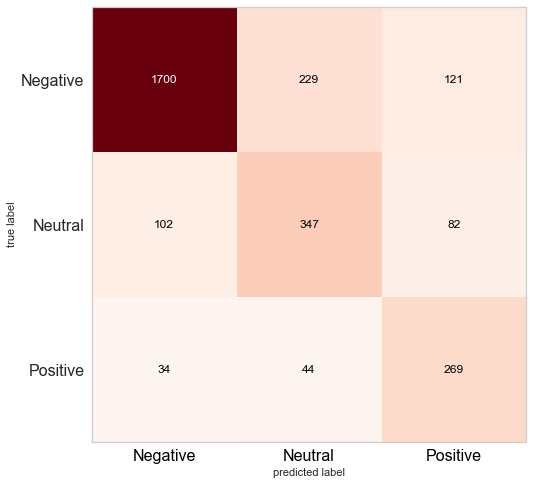

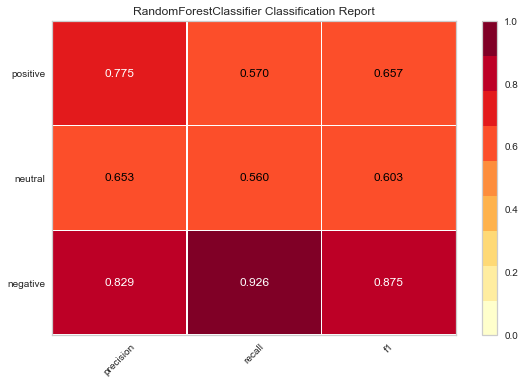

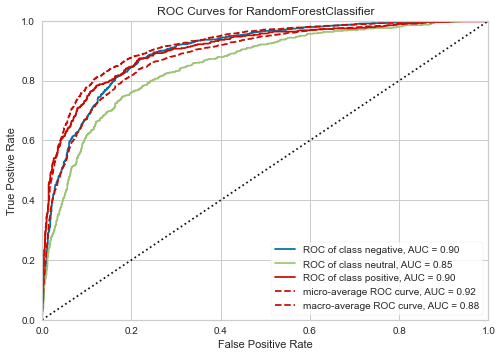

GradientBoostingClassifier on cleaned stem text with vectorizer: CountVectorized
Accuracy of GradientBoostingClassifier on cleaned stem text with vectorizer: CountVectorized is 0.7913251366120219
              precision    recall  f1-score   support

    negative       0.92      0.84      0.88      2006
     neutral       0.56      0.64      0.60       545
    positive       0.61      0.76      0.68       377

    accuracy                           0.79      2928
   macro avg       0.70      0.75      0.72      2928
weighted avg       0.81      0.79      0.80      2928



<Figure size 576x396 with 0 Axes>

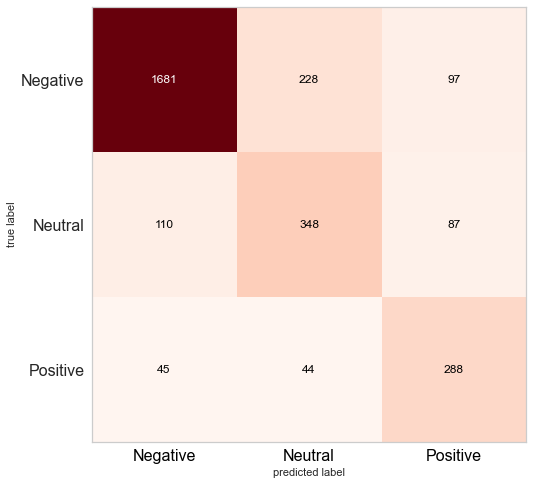

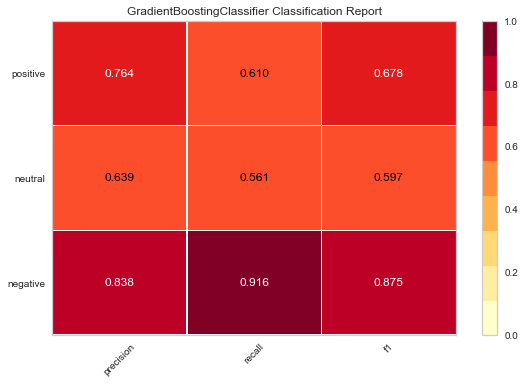

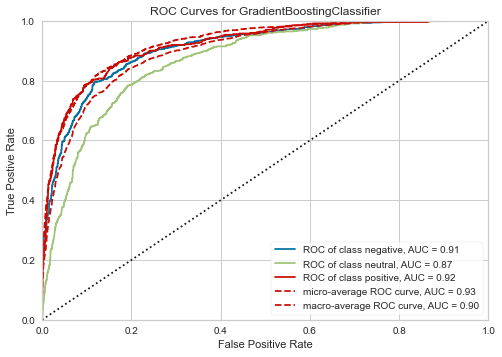

LogisticRegression on cleaned stem text with vectorizer: CountVectorized
Accuracy of LogisticRegression on cleaned stem text with vectorizer: CountVectorized is 0.7961065573770492
              precision    recall  f1-score   support

    negative       0.90      0.86      0.88      1909
     neutral       0.62      0.62      0.62       613
    positive       0.64      0.75      0.69       406

    accuracy                           0.80      2928
   macro avg       0.72      0.74      0.73      2928
weighted avg       0.80      0.80      0.80      2928



<Figure size 576x396 with 0 Axes>

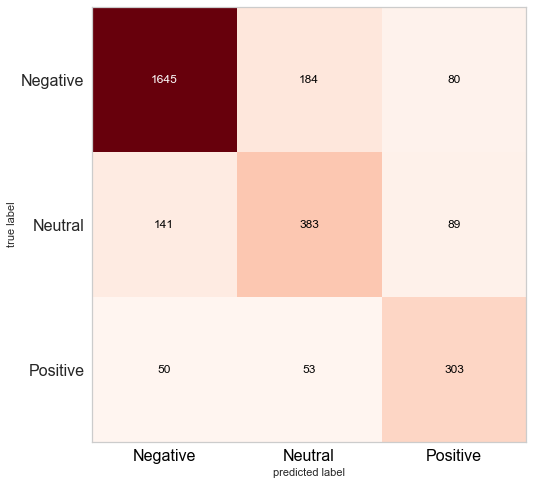

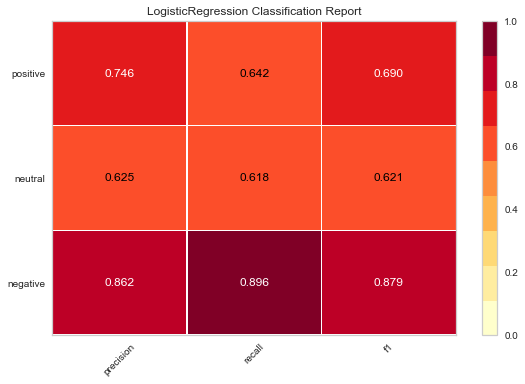

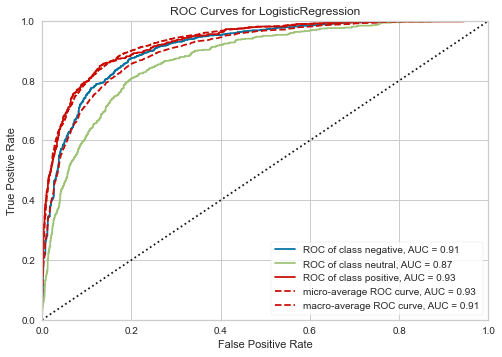

SVC on cleaned stem text with vectorizer: CountVectorized
Accuracy of SVC on cleaned stem text with vectorizer: CountVectorized is 0.798155737704918
              precision    recall  f1-score   support

    negative       0.93      0.83      0.88      2053
     neutral       0.57      0.66      0.61       531
    positive       0.59      0.81      0.68       344

    accuracy                           0.80      2928
   macro avg       0.69      0.77      0.72      2928
weighted avg       0.82      0.80      0.81      2928



<Figure size 576x396 with 0 Axes>

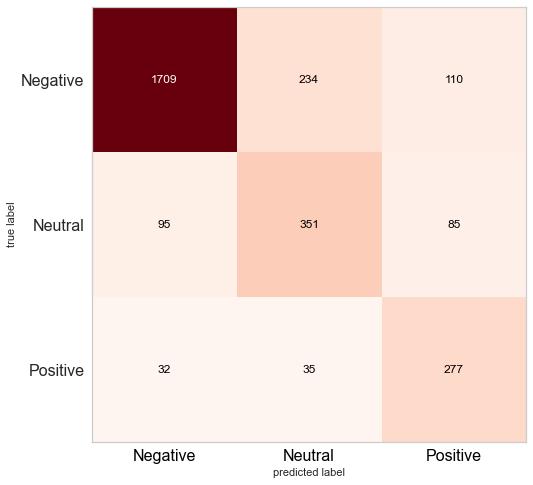

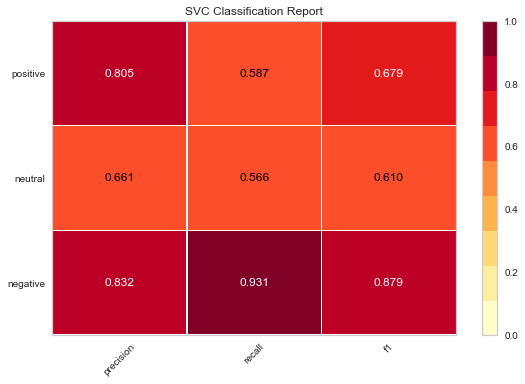

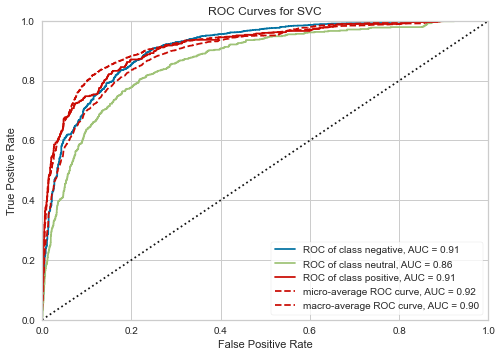

KNeighborsClassifier on cleaned stem text with vectorizer: CountVectorized
Accuracy of KNeighborsClassifier on cleaned stem text with vectorizer: CountVectorized is 0.567964480874317
              precision    recall  f1-score   support

    negative       0.54      0.83      0.65      1197
     neutral       0.66      0.33      0.44      1244
    positive       0.56      0.54      0.55       487

    accuracy                           0.57      2928
   macro avg       0.59      0.57      0.55      2928
weighted avg       0.59      0.57      0.55      2928



<Figure size 576x396 with 0 Axes>

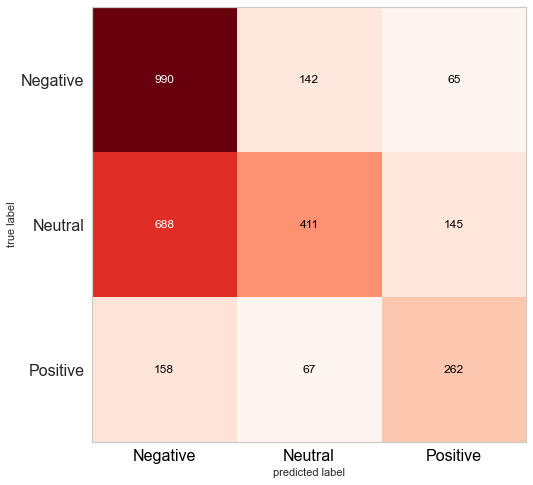

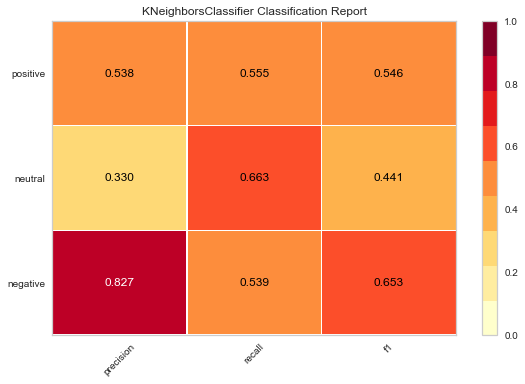

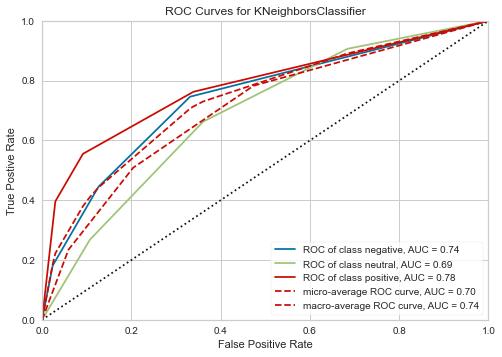

AdaBoostClassifier on cleaned stem text with vectorizer: CountVectorized
Accuracy of AdaBoostClassifier on cleaned stem text with vectorizer: CountVectorized is 0.7479508196721312
              precision    recall  f1-score   support

    negative       0.91      0.79      0.84      2121
     neutral       0.38      0.57      0.46       415
    positive       0.60      0.72      0.66       392

    accuracy                           0.75      2928
   macro avg       0.63      0.69      0.65      2928
weighted avg       0.79      0.75      0.76      2928



<Figure size 576x396 with 0 Axes>

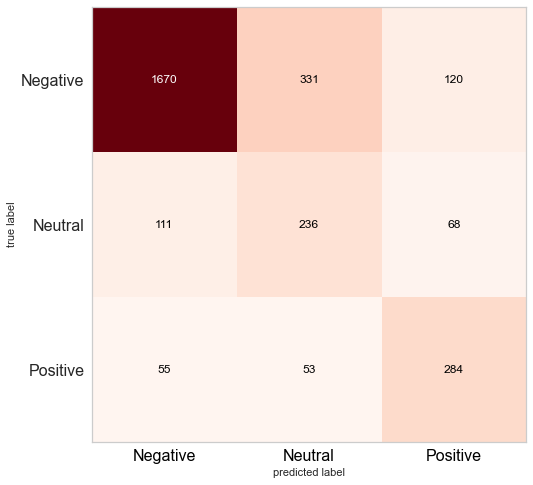

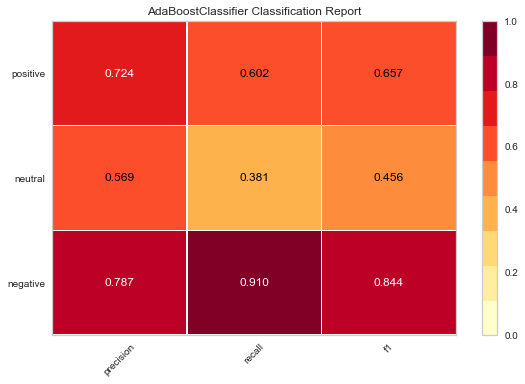

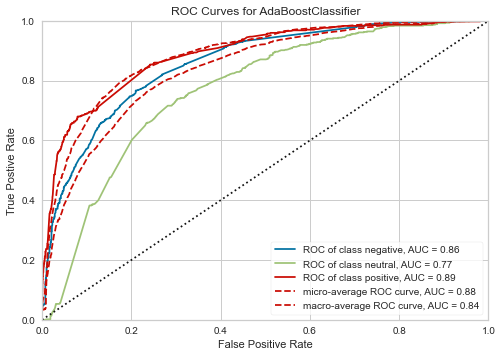

GaussianNB on cleaned stem text with vectorizer: CountVectorized
Accuracy of GaussianNB on cleaned stem text with vectorizer: CountVectorized is 0.42008196721311475
              precision    recall  f1-score   support

    negative       0.40      0.80      0.54       920
     neutral       0.28      0.28      0.28       621
    positive       0.67      0.23      0.34      1387

    accuracy                           0.42      2928
   macro avg       0.45      0.44      0.39      2928
weighted avg       0.50      0.42      0.39      2928



<Figure size 576x396 with 0 Axes>

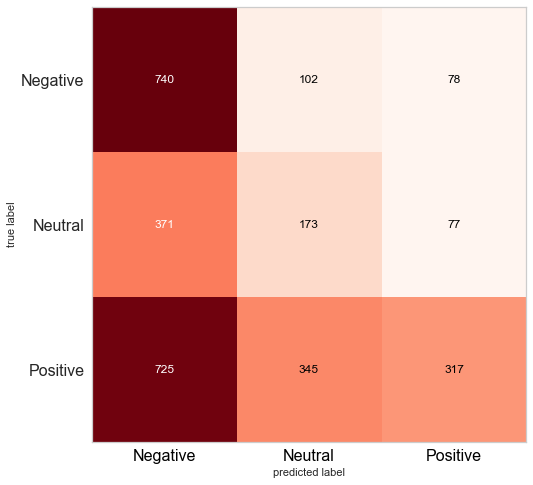

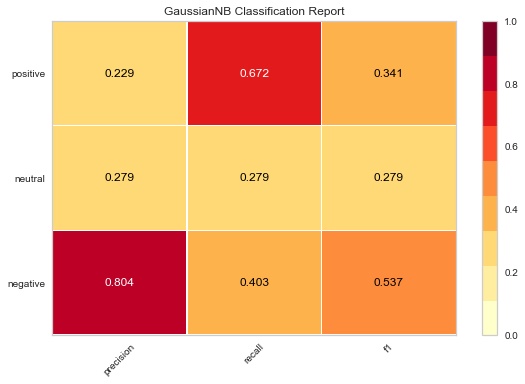

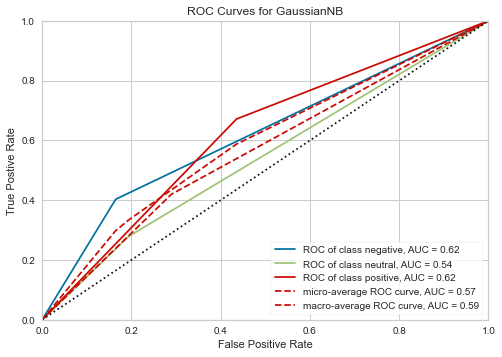

TfIDF shape:  (2928, 10100)
DecisionTreeClassifier on cleaned stem text with vectorizer: TfidfVectorizer
Accuracy of DecisionTreeClassifier on cleaned stem text with vectorizer: TfidfVectorizer is 0.7025273224043715
              precision    recall  f1-score   support

    negative       0.81      0.80      0.81      1873
     neutral       0.48      0.47      0.48       631
    positive       0.56      0.62      0.59       424

    accuracy                           0.70      2928
   macro avg       0.62      0.63      0.62      2928
weighted avg       0.71      0.70      0.70      2928



<Figure size 576x396 with 0 Axes>

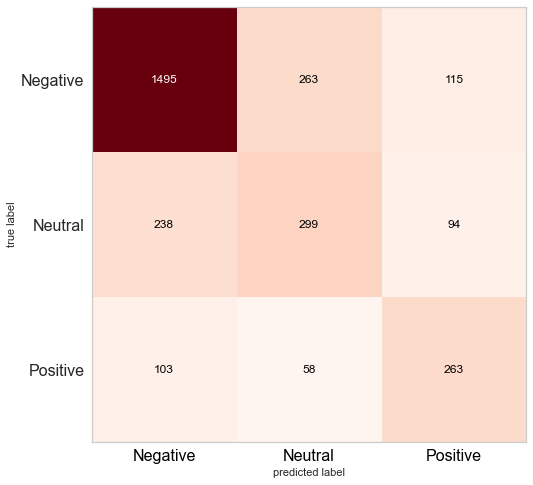

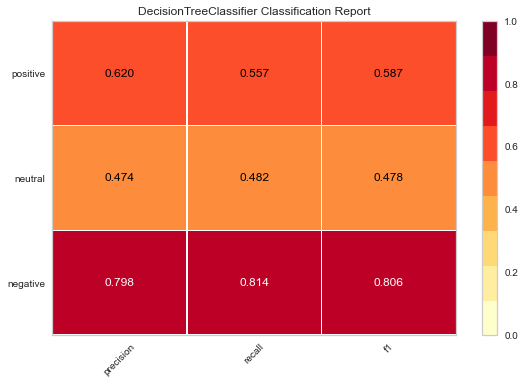

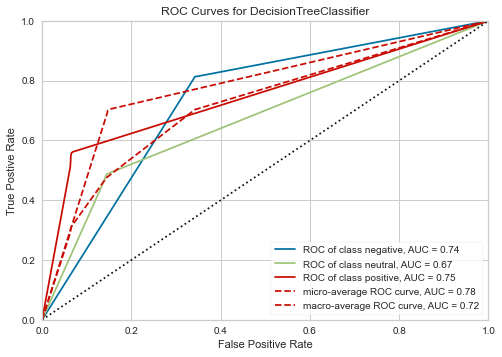

RandomForestClassifier on cleaned stem text with vectorizer: TfidfVectorizer
Accuracy of RandomForestClassifier on cleaned stem text with vectorizer: TfidfVectorizer is 0.7739071038251366
              precision    recall  f1-score   support

    negative       0.95      0.79      0.86      2188
     neutral       0.45      0.66      0.53       427
    positive       0.53      0.80      0.63       313

    accuracy                           0.77      2928
   macro avg       0.64      0.75      0.68      2928
weighted avg       0.83      0.77      0.79      2928



<Figure size 576x396 with 0 Axes>

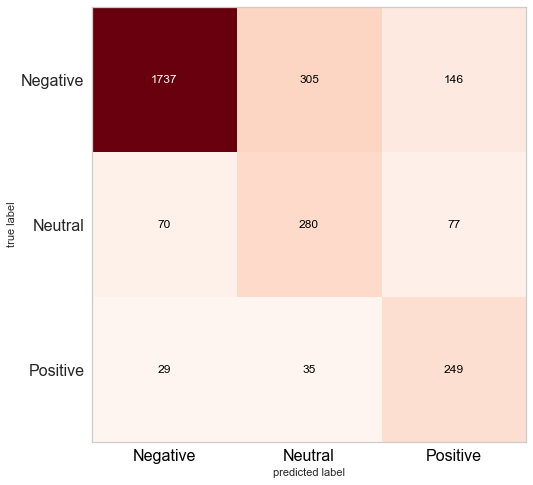

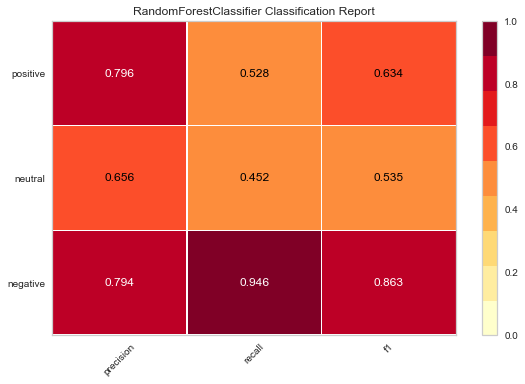

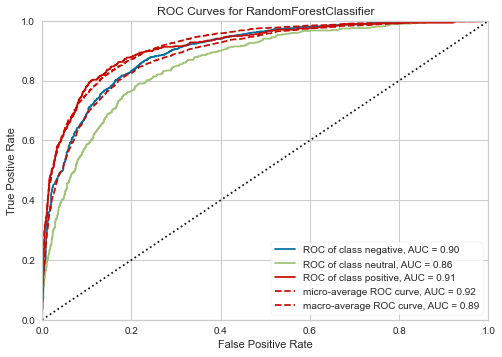

GradientBoostingClassifier on cleaned stem text with vectorizer: TfidfVectorizer
Accuracy of GradientBoostingClassifier on cleaned stem text with vectorizer: TfidfVectorizer is 0.7865437158469946
              precision    recall  f1-score   support

    negative       0.91      0.83      0.87      2010
     neutral       0.55      0.64      0.59       539
    positive       0.61      0.76      0.68       379

    accuracy                           0.79      2928
   macro avg       0.69      0.74      0.71      2928
weighted avg       0.81      0.79      0.79      2928



<Figure size 576x396 with 0 Axes>

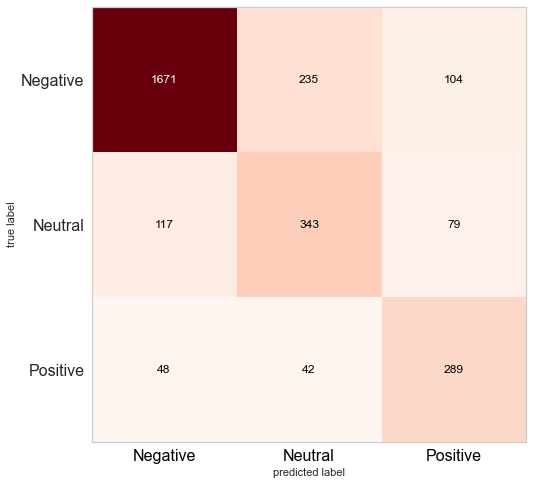

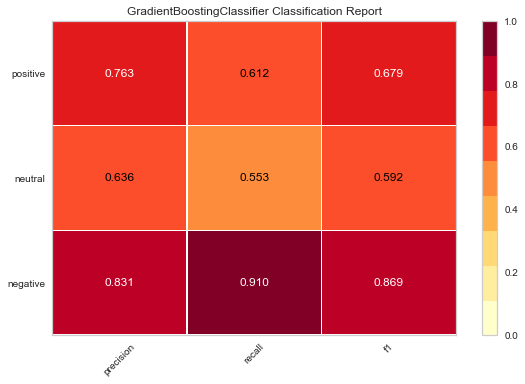

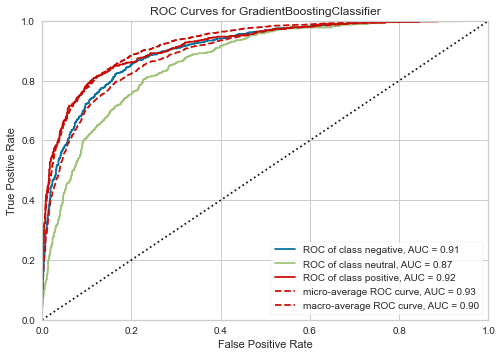

LogisticRegression on cleaned stem text with vectorizer: TfidfVectorizer
Accuracy of LogisticRegression on cleaned stem text with vectorizer: TfidfVectorizer is 0.7988387978142076
              precision    recall  f1-score   support

    negative       0.94      0.83      0.88      2065
     neutral       0.56      0.66      0.61       520
    positive       0.58      0.80      0.67       343

    accuracy                           0.80      2928
   macro avg       0.69      0.77      0.72      2928
weighted avg       0.83      0.80      0.81      2928



<Figure size 576x396 with 0 Axes>

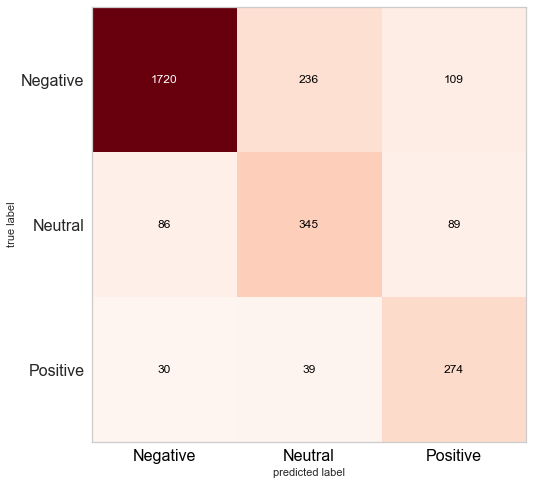

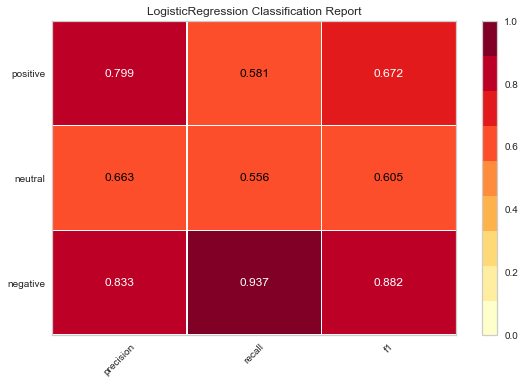

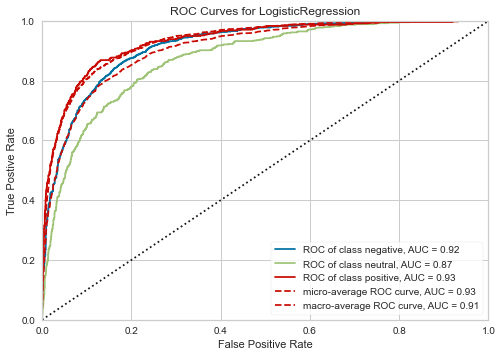

SVC on cleaned stem text with vectorizer: TfidfVectorizer
Accuracy of SVC on cleaned stem text with vectorizer: TfidfVectorizer is 0.796448087431694
              precision    recall  f1-score   support

    negative       0.95      0.82      0.88      2121
     neutral       0.52      0.69      0.59       466
    positive       0.58      0.80      0.67       341

    accuracy                           0.80      2928
   macro avg       0.68      0.77      0.71      2928
weighted avg       0.84      0.80      0.81      2928



<Figure size 576x396 with 0 Axes>

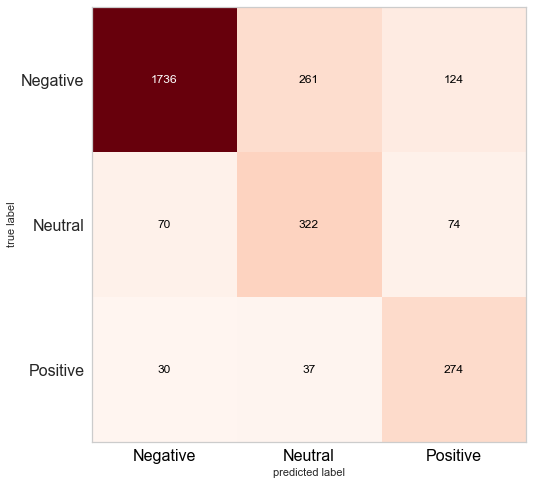

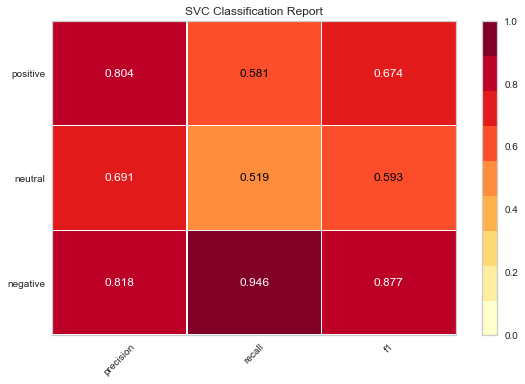

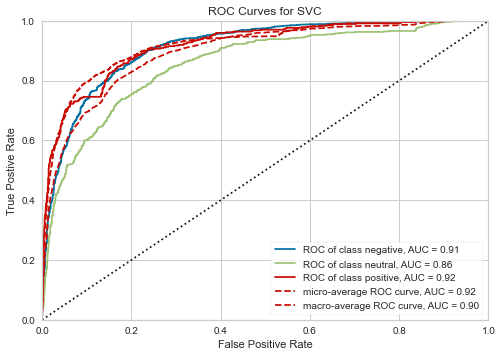

KNeighborsClassifier on cleaned stem text with vectorizer: TfidfVectorizer
Accuracy of KNeighborsClassifier on cleaned stem text with vectorizer: TfidfVectorizer is 0.6806693989071039
              precision    recall  f1-score   support

    negative       0.80      0.78      0.79      1886
     neutral       0.45      0.45      0.45       628
    positive       0.52      0.59      0.56       414

    accuracy                           0.68      2928
   macro avg       0.59      0.61      0.60      2928
weighted avg       0.69      0.68      0.68      2928



<Figure size 576x396 with 0 Axes>

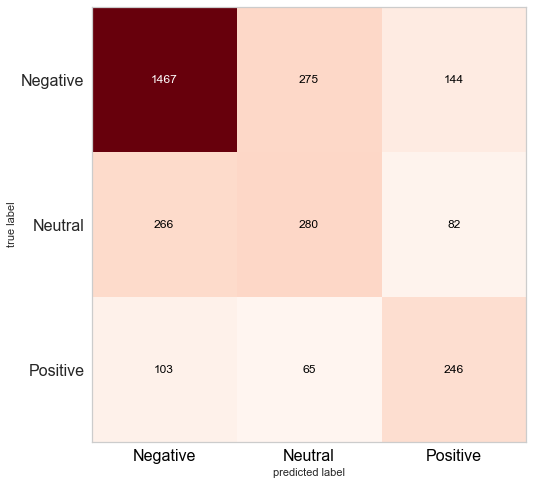

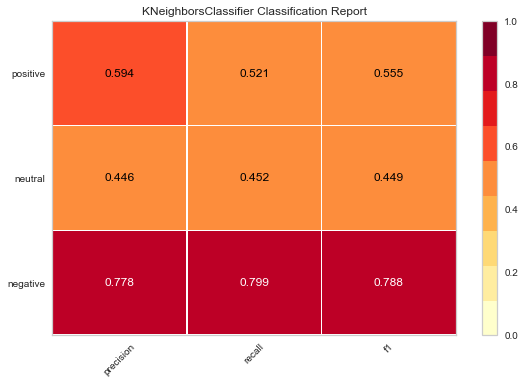

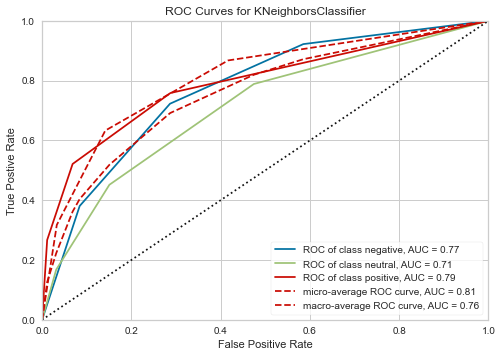

AdaBoostClassifier on cleaned stem text with vectorizer: TfidfVectorizer
Accuracy of AdaBoostClassifier on cleaned stem text with vectorizer: TfidfVectorizer is 0.7441939890710383
              precision    recall  f1-score   support

    negative       0.90      0.79      0.84      2080
     neutral       0.40      0.55      0.46       452
    positive       0.60      0.71      0.65       396

    accuracy                           0.74      2928
   macro avg       0.63      0.68      0.65      2928
weighted avg       0.78      0.74      0.76      2928



<Figure size 576x396 with 0 Axes>

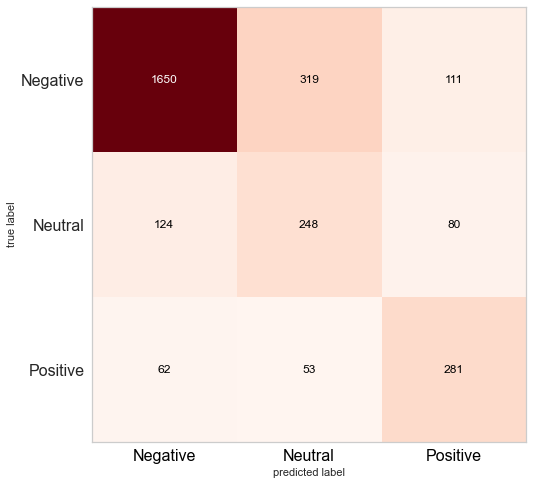

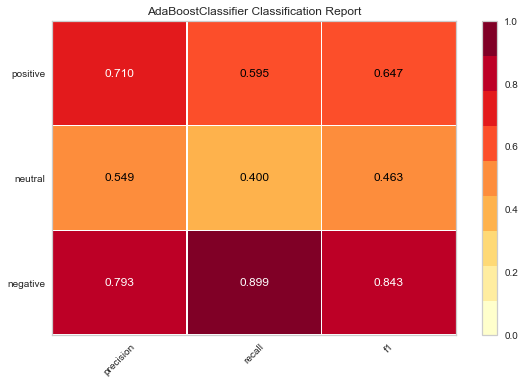

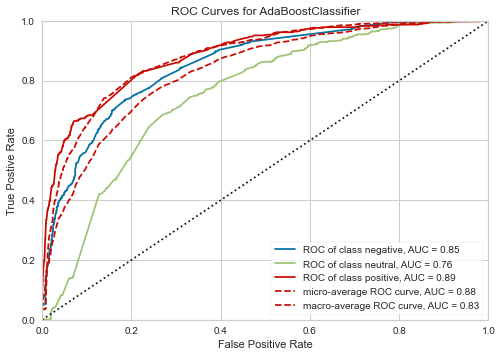

GaussianNB on cleaned stem text with vectorizer: TfidfVectorizer
Accuracy of GaussianNB on cleaned stem text with vectorizer: TfidfVectorizer is 0.42042349726775957
              precision    recall  f1-score   support

    negative       0.41      0.80      0.54       934
     neutral       0.28      0.28      0.28       625
    positive       0.66      0.23      0.34      1369

    accuracy                           0.42      2928
   macro avg       0.45      0.43      0.39      2928
weighted avg       0.50      0.42      0.39      2928



<Figure size 576x396 with 0 Axes>

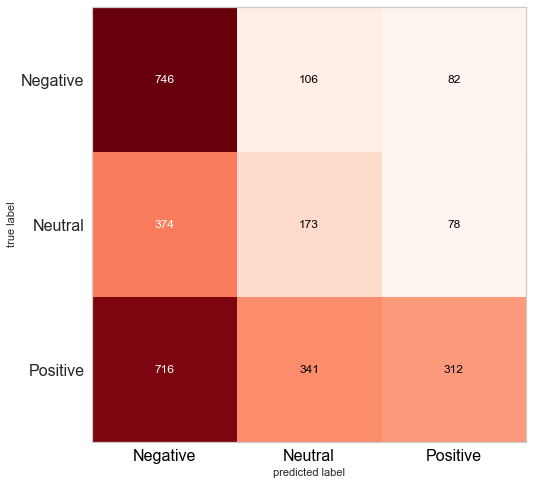

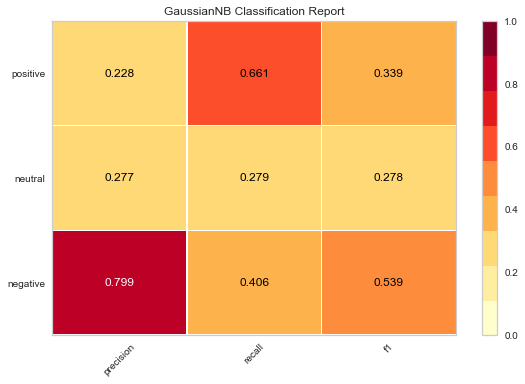

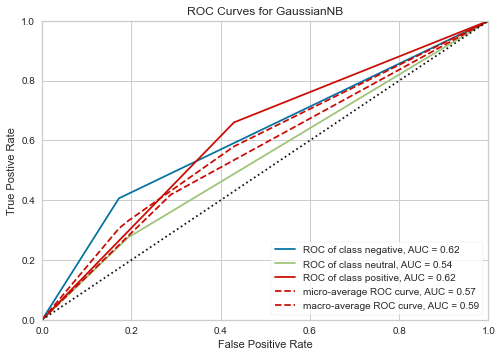

In [57]:
# Fit the DTM generated using 'stem' cleaned corpus on both vectorizer

process_column('stem')


In [58]:
df_result_mod_train.sort_values(by='Accuracy', ascending=False, ignore_index=True)

Classifier processed_data       Vectorizer  Accuracy
0           LogisticRegression           stem  TfidfVectorizer  0.798839
1           LogisticRegression           stem  TfidfVectorizer  0.798839
2                          SVC           stem  CountVectorized  0.798156
3                          SVC           stem  CountVectorized  0.798156
4           LogisticRegression          lemma  TfidfVectorizer  0.797814
5                          SVC          lemma  TfidfVectorizer  0.796790
6                          SVC           stem  TfidfVectorizer  0.796448
7                          SVC           stem  TfidfVectorizer  0.796448
8           LogisticRegression           stem  CountVectorized  0.796107
9           LogisticRegression           stem  CountVectorized  0.796107
10          LogisticRegression          lemma  CountVectorized  0.793716
11      RandomForestClassifier          lemma  CountVectorized  0.791325
12  GradientBoostingClassifier           stem  CountVectorized  0.791325
13      RandomForestClassifier           stem  CountVectorized  0.790984
14  GradientBoostingClassifier          lemma  TfidfVectorizer  0.789959
15                         SVC          lemma  CountVectorized  0.788593
16      RandomForestClassifier           stem  CountVectorized  0.788251
17  GradientBoostingClassifier          lemma  CountVectorized  0.787568
18  GradientBoostingClassifier           stem  TfidfVectorizer  0.786544
19  GradientBoostingClassifier           stem  TfidfVectorizer  0.785861
20  GradientBoostingClassifier           stem  CountVectorized  0.778347
21      RandomForestClassifier           stem  TfidfVectorizer  0.774249
22      RandomForestClassifier           stem  TfidfVectorizer  0.773907
23      RandomForestClassifier          lemma  TfidfVectorizer  0.773566
24          AdaBoostClassifier          lemma  CountVectorized  0.751025
25          AdaBoostClassifier           stem  CountVectorized  0.747951
26          AdaBoostClassifier           stem  CountVectorized  0.747951
27          AdaBoostClassifier          lemma  TfidfVectorizer  0.745902
28          AdaBoostClassifier           stem  TfidfVectorizer  0.744194
29          AdaBoostClassifier           stem  TfidfVectorizer  0.744194
30      DecisionTreeClassifier           stem  CountVectorized  0.722336
31      DecisionTreeClassifier           stem  CountVectorized  0.715505
32      DecisionTreeClassifier          lemma  CountVectorized  0.714139
33      DecisionTreeClassifier           stem  TfidfVectorizer  0.711066
34      DecisionTreeClassifier          lemma  TfidfVectorizer  0.707992
35      DecisionTreeClassifier           stem  TfidfVectorizer  0.702527
36        KNeighborsClassifier          lemma  TfidfVectorizer  0.681694
37        KNeighborsClassifier           stem  TfidfVectorizer  0.680669
38        KNeighborsClassifier           stem  TfidfVectorizer  0.680669
39        KNeighborsClassifier          lemma  CountVectorized  0.573429
40        KNeighborsClassifier           stem  CountVectorized  0.567964
41        KNeighborsClassifier           stem  CountVectorized  0.567964
42                  GaussianNB          lemma  TfidfVectorizer  0.422473
43                  GaussianNB           stem  TfidfVectorizer  0.420423
44                  GaussianNB           stem  TfidfVectorizer  0.420423
45                  GaussianNB          lemma  CountVectorized  0.420082
46                  GaussianNB           stem  CountVectorized  0.420082
47                  GaussianNB           stem  CountVectorized  0.420082

Creating CountVectorized bag of words...

CountVectorized shape:  (11712, 10883)
DecisionTreeClassifier on cleaned lemma text with vectorizer: CountVectorized
Accuracy of DecisionTreeClassifier on cleaned lemma text with vectorizer: CountVectorized is 0.7137978142076503
              precision    recall  f1-score   support

    negative       0.82      0.82      0.82      1848
     neutral       0.50      0.49      0.49       635
    positive       0.57      0.61      0.59       445

    accuracy                           0.71      2928
   macro avg       0.63      0.64      0.63      2928
weighted avg       0.71      0.71      0.71      2928



<Figure size 576x396 with 0 Axes>

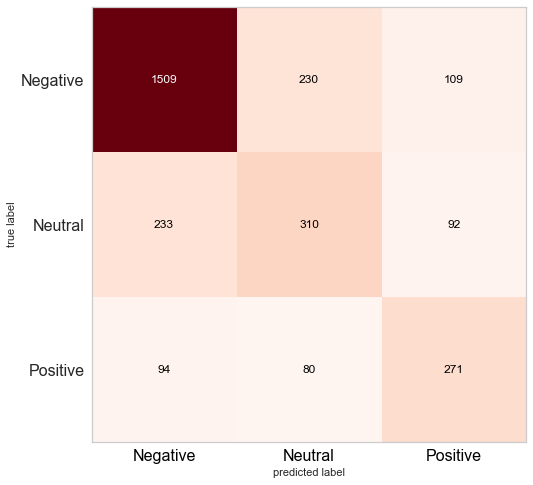

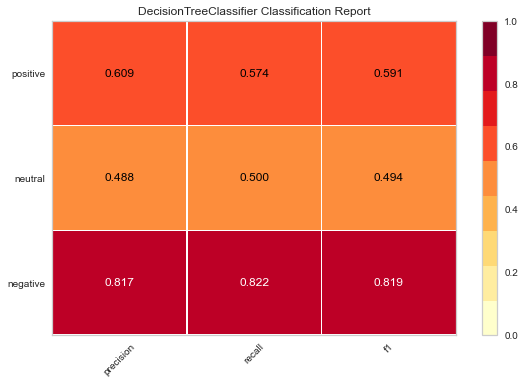

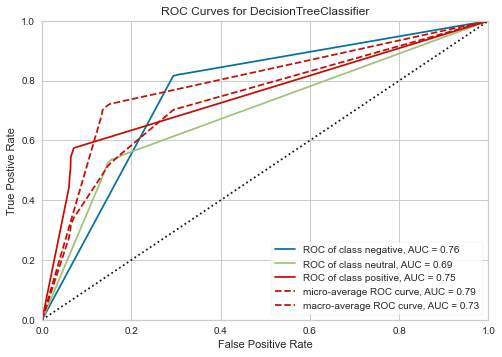

RandomForestClassifier on cleaned lemma text with vectorizer: CountVectorized
Accuracy of RandomForestClassifier on cleaned lemma text with vectorizer: CountVectorized is 0.7889344262295082
              precision    recall  f1-score   support

    negative       0.93      0.82      0.87      2072
     neutral       0.54      0.66      0.59       509
    positive       0.57      0.77      0.65       347

    accuracy                           0.79      2928
   macro avg       0.68      0.75      0.71      2928
weighted avg       0.82      0.79      0.80      2928



<Figure size 576x396 with 0 Axes>

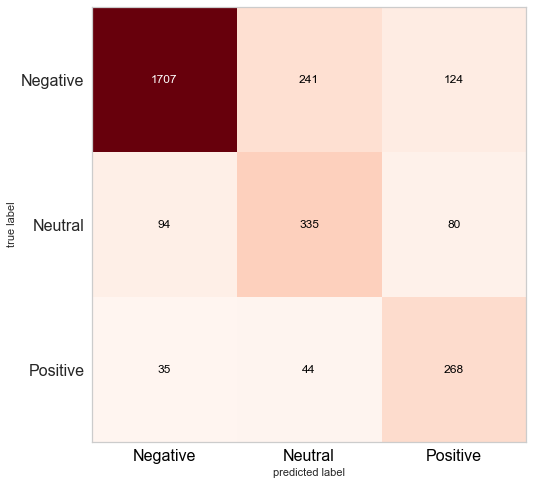

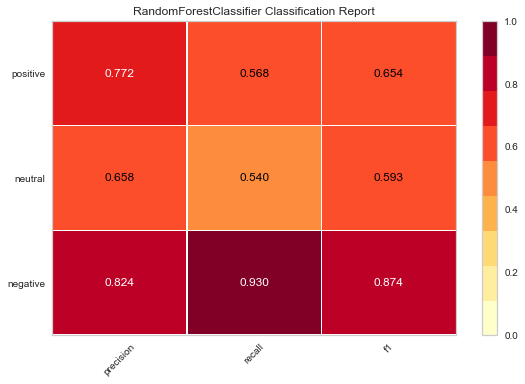

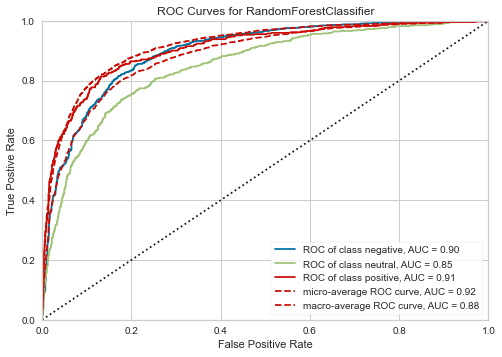

GradientBoostingClassifier on cleaned lemma text with vectorizer: CountVectorized
Accuracy of GradientBoostingClassifier on cleaned lemma text with vectorizer: CountVectorized is 0.7937158469945356
              precision    recall  f1-score   support

    negative       0.91      0.84      0.88      1993
     neutral       0.56      0.64      0.60       538
    positive       0.63      0.75      0.69       397

    accuracy                           0.79      2928
   macro avg       0.70      0.75      0.72      2928
weighted avg       0.81      0.79      0.80      2928



<Figure size 576x396 with 0 Axes>

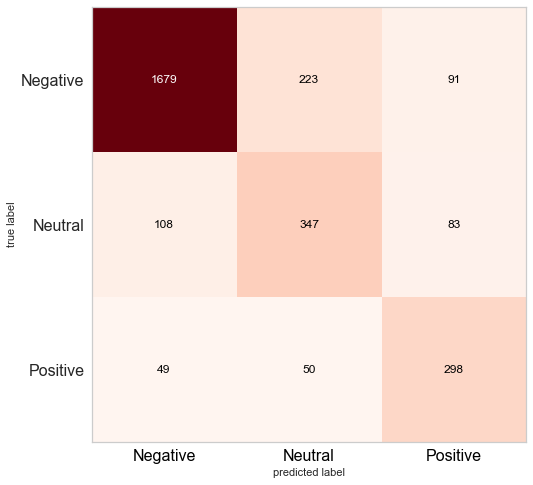

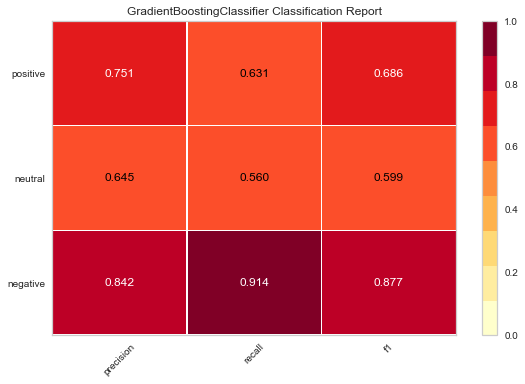

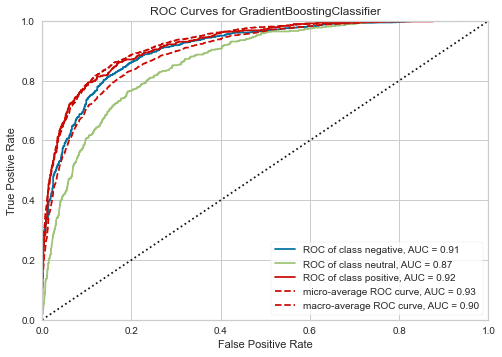

LogisticRegression on cleaned lemma text with vectorizer: CountVectorized
Accuracy of LogisticRegression on cleaned lemma text with vectorizer: CountVectorized is 0.7937158469945356
              precision    recall  f1-score   support

    negative       0.89      0.86      0.88      1903
     neutral       0.61      0.61      0.61       614
    positive       0.65      0.74      0.69       411

    accuracy                           0.79      2928
   macro avg       0.72      0.74      0.73      2928
weighted avg       0.80      0.79      0.80      2928



<Figure size 576x396 with 0 Axes>

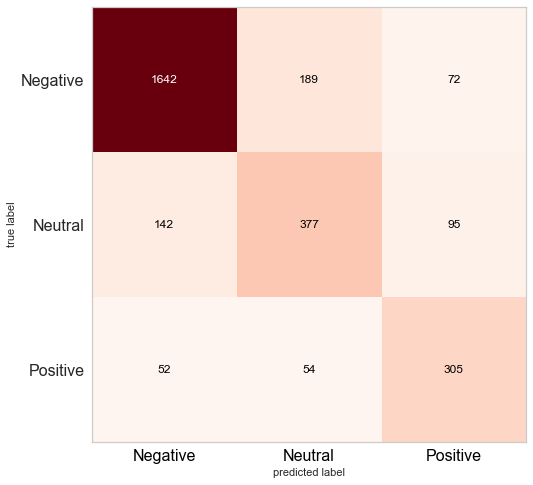

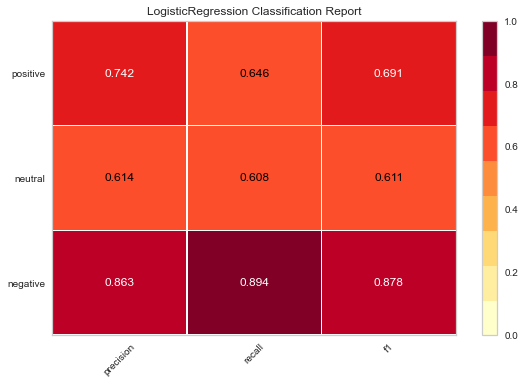

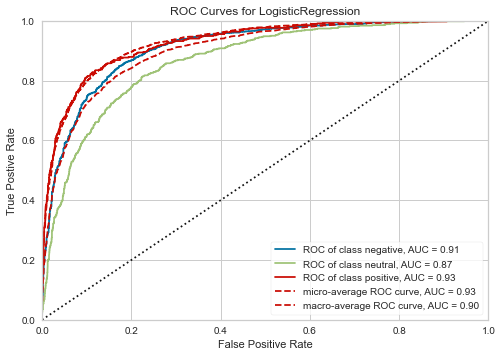

SVC on cleaned lemma text with vectorizer: CountVectorized
Accuracy of SVC on cleaned lemma text with vectorizer: CountVectorized is 0.7885928961748634
              precision    recall  f1-score   support

    negative       0.92      0.83      0.87      2048
     neutral       0.55      0.64      0.60       534
    positive       0.58      0.79      0.67       346

    accuracy                           0.79      2928
   macro avg       0.68      0.75      0.71      2928
weighted avg       0.81      0.79      0.80      2928



<Figure size 576x396 with 0 Axes>

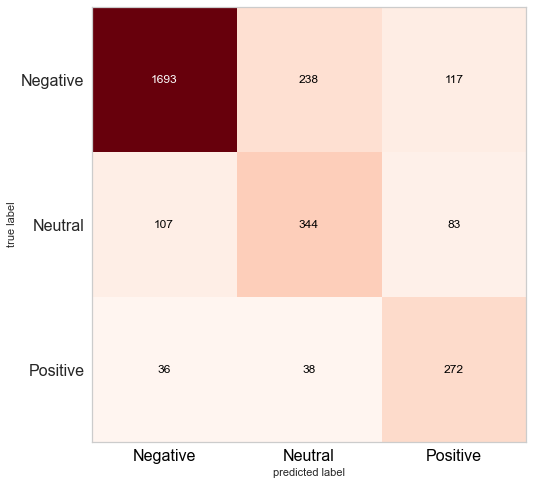

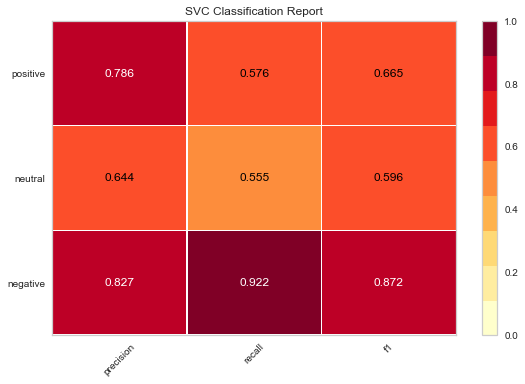

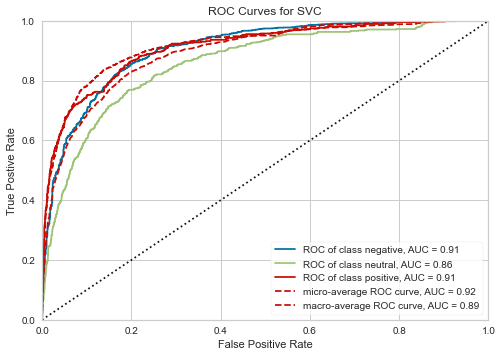

KNeighborsClassifier on cleaned lemma text with vectorizer: CountVectorized
Accuracy of KNeighborsClassifier on cleaned lemma text with vectorizer: CountVectorized is 0.5734289617486339
              precision    recall  f1-score   support

    negative       0.55      0.83      0.66      1221
     neutral       0.65      0.33      0.44      1212
    positive       0.56      0.53      0.54       495

    accuracy                           0.57      2928
   macro avg       0.59      0.56      0.55      2928
weighted avg       0.59      0.57      0.55      2928



<Figure size 576x396 with 0 Axes>

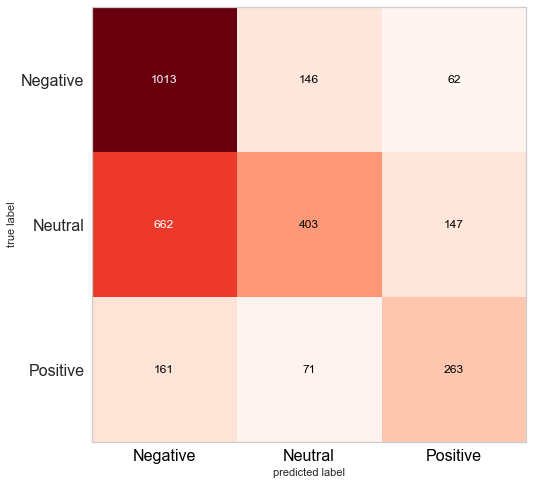

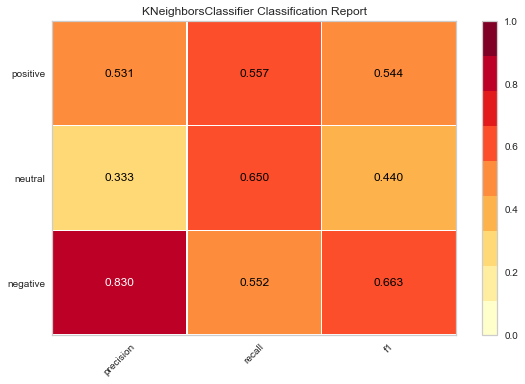

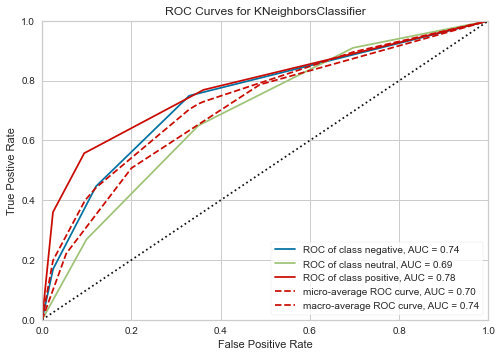

AdaBoostClassifier on cleaned lemma text with vectorizer: CountVectorized
Accuracy of AdaBoostClassifier on cleaned lemma text with vectorizer: CountVectorized is 0.7510245901639344
              precision    recall  f1-score   support

    negative       0.90      0.79      0.85      2091
     neutral       0.40      0.58      0.47       424
    positive       0.62      0.71      0.66       413

    accuracy                           0.75      2928
   macro avg       0.64      0.69      0.66      2928
weighted avg       0.79      0.75      0.77      2928



<Figure size 576x396 with 0 Axes>

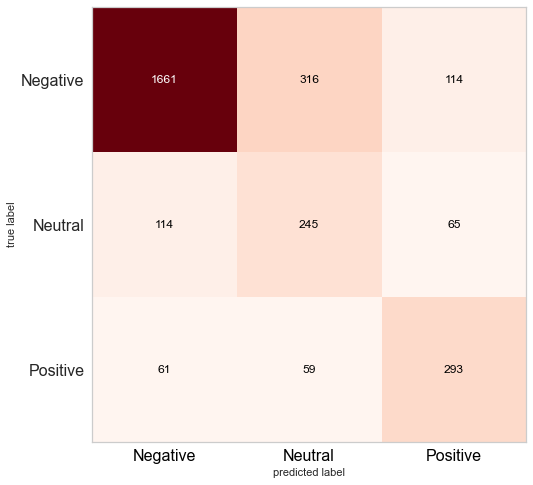

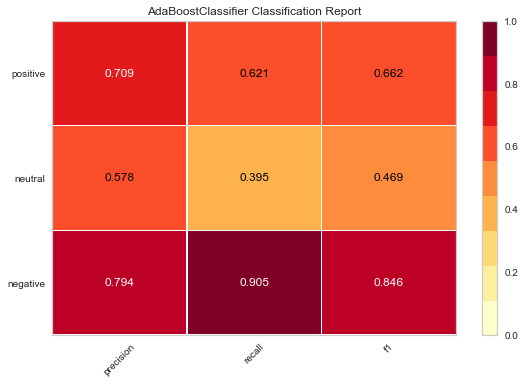

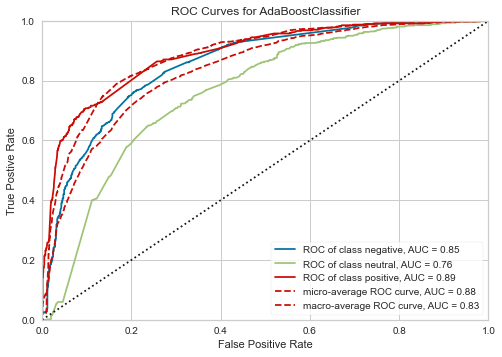

GaussianNB on cleaned lemma text with vectorizer: CountVectorized
Accuracy of GaussianNB on cleaned lemma text with vectorizer: CountVectorized is 0.42008196721311475
              precision    recall  f1-score   support

    negative       0.41      0.80      0.54       939
     neutral       0.28      0.27      0.28       622
    positive       0.65      0.22      0.33      1367

    accuracy                           0.42      2928
   macro avg       0.44      0.43      0.38      2928
weighted avg       0.49      0.42      0.39      2928



<Figure size 576x396 with 0 Axes>

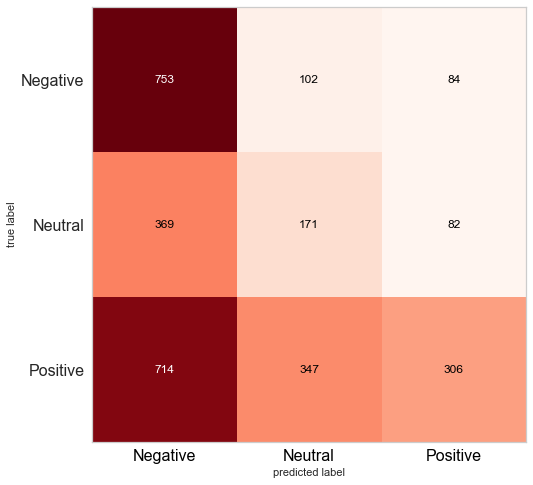

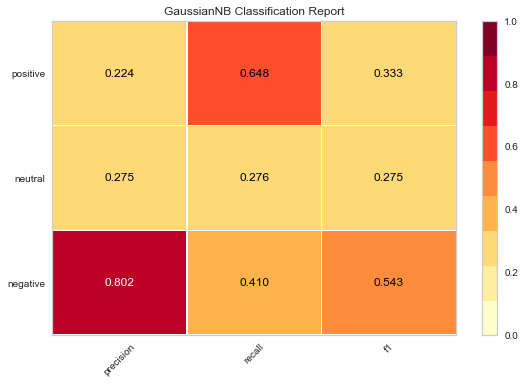

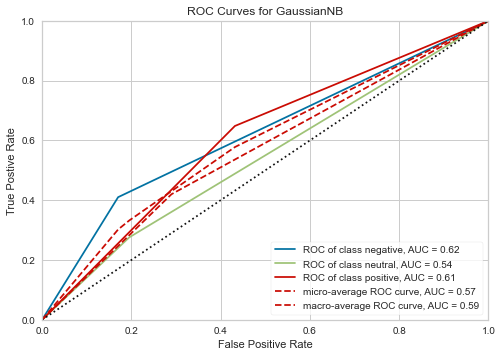

TfIDF shape:  (2928, 10883)
DecisionTreeClassifier on cleaned lemma text with vectorizer: TfidfVectorizer
Accuracy of DecisionTreeClassifier on cleaned lemma text with vectorizer: TfidfVectorizer is 0.6970628415300546
              precision    recall  f1-score   support

    negative       0.81      0.79      0.80      1876
     neutral       0.47      0.47      0.47       614
    positive       0.56      0.60      0.58       438

    accuracy                           0.70      2928
   macro avg       0.61      0.62      0.62      2928
weighted avg       0.70      0.70      0.70      2928



<Figure size 576x396 with 0 Axes>

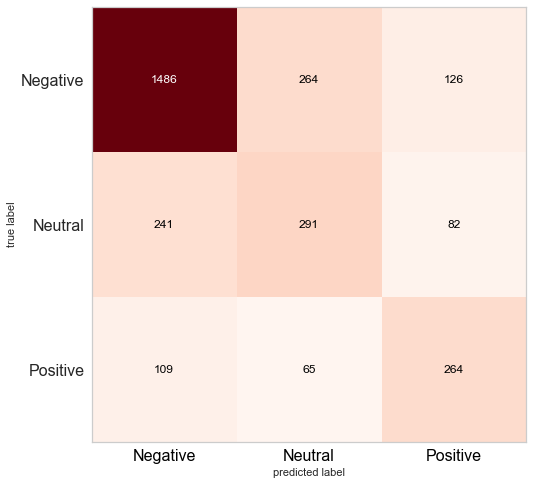

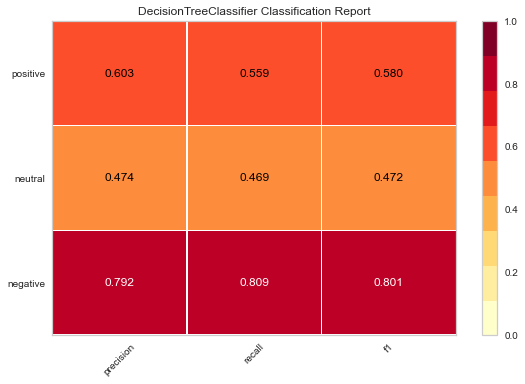

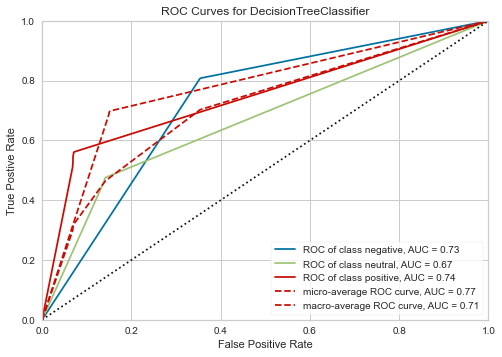

RandomForestClassifier on cleaned lemma text with vectorizer: TfidfVectorizer
Accuracy of RandomForestClassifier on cleaned lemma text with vectorizer: TfidfVectorizer is 0.7742486338797814
              precision    recall  f1-score   support

    negative       0.95      0.79      0.86      2221
     neutral       0.44      0.68      0.54       400
    positive       0.52      0.80      0.63       307

    accuracy                           0.77      2928
   macro avg       0.64      0.76      0.68      2928
weighted avg       0.84      0.77      0.79      2928



<Figure size 576x396 with 0 Axes>

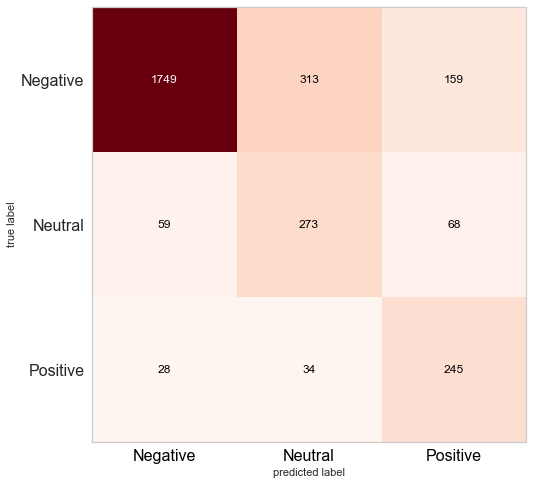

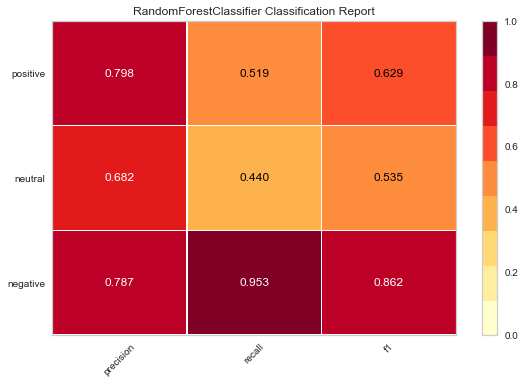

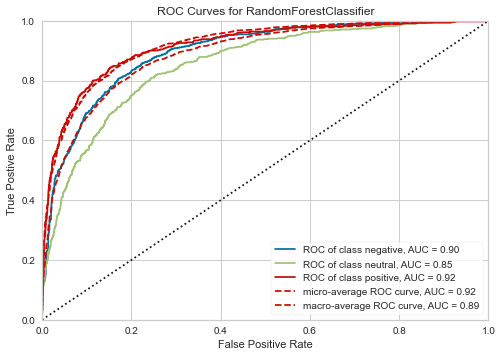

GradientBoostingClassifier on cleaned lemma text with vectorizer: TfidfVectorizer
Accuracy of GradientBoostingClassifier on cleaned lemma text with vectorizer: TfidfVectorizer is 0.7913251366120219
              precision    recall  f1-score   support

    negative       0.91      0.84      0.87      2006
     neutral       0.55      0.64      0.59       530
    positive       0.64      0.77      0.70       392

    accuracy                           0.79      2928
   macro avg       0.70      0.75      0.72      2928
weighted avg       0.81      0.79      0.80      2928



<Figure size 576x396 with 0 Axes>

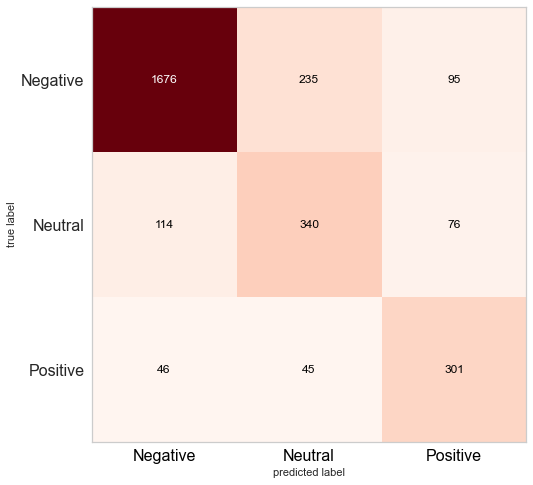

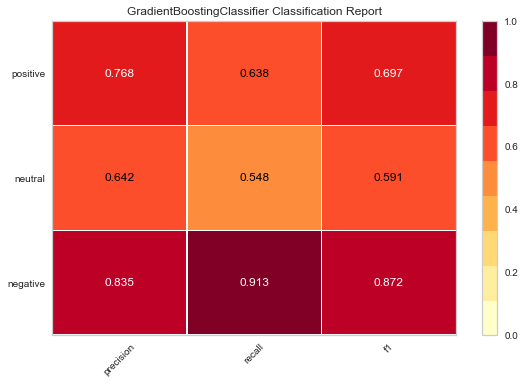

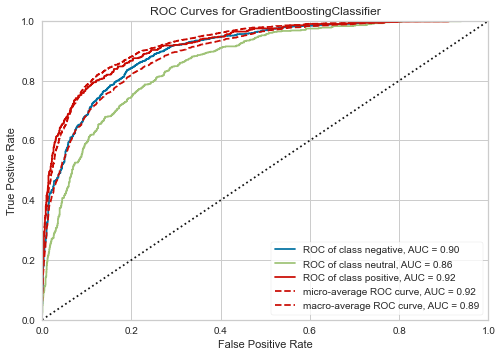

LogisticRegression on cleaned lemma text with vectorizer: TfidfVectorizer
Accuracy of LogisticRegression on cleaned lemma text with vectorizer: TfidfVectorizer is 0.7978142076502732
              precision    recall  f1-score   support

    negative       0.94      0.83      0.88      2065
     neutral       0.55      0.66      0.60       513
    positive       0.59      0.80      0.68       350

    accuracy                           0.80      2928
   macro avg       0.69      0.76      0.72      2928
weighted avg       0.83      0.80      0.81      2928



<Figure size 576x396 with 0 Axes>

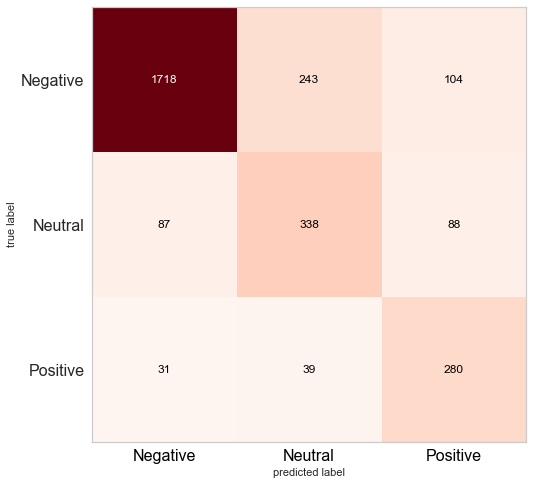

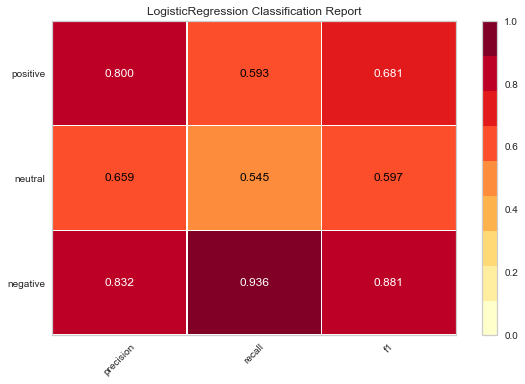

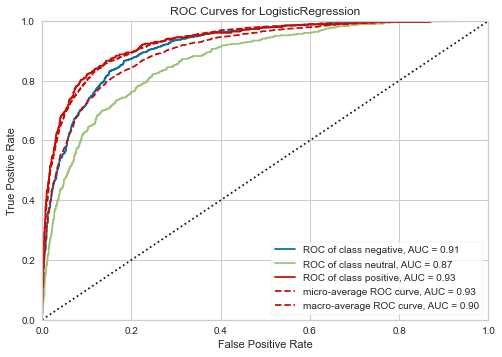

SVC on cleaned lemma text with vectorizer: TfidfVectorizer
Accuracy of SVC on cleaned lemma text with vectorizer: TfidfVectorizer is 0.7967896174863388
              precision    recall  f1-score   support

    negative       0.94      0.82      0.88      2115
     neutral       0.52      0.69      0.60       468
    positive       0.59      0.81      0.68       345

    accuracy                           0.80      2928
   macro avg       0.68      0.77      0.72      2928
weighted avg       0.83      0.80      0.81      2928



<Figure size 576x396 with 0 Axes>

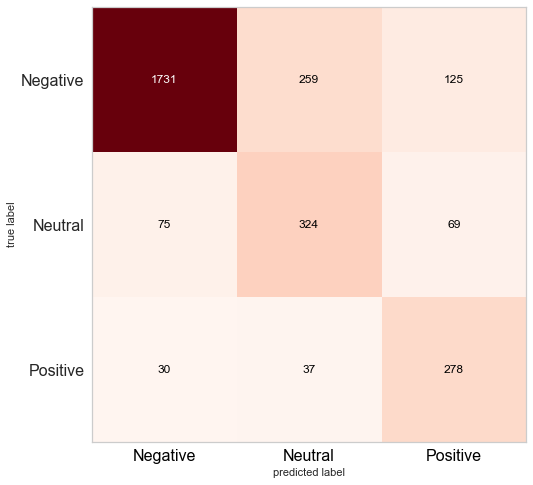

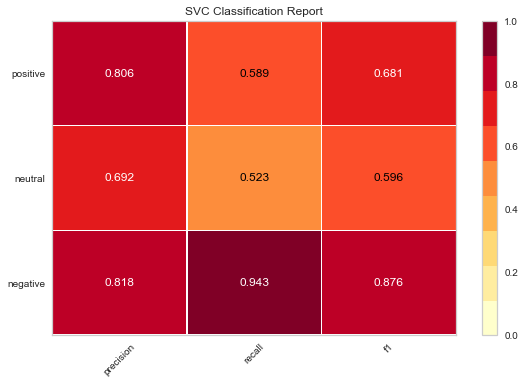

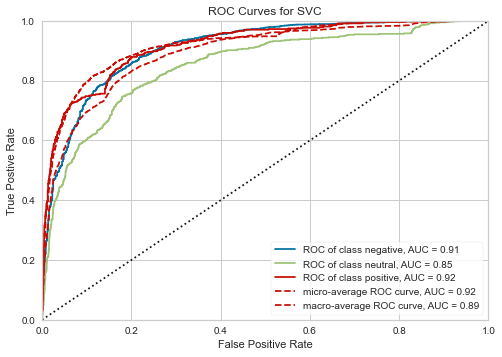

KNeighborsClassifier on cleaned lemma text with vectorizer: TfidfVectorizer
Accuracy of KNeighborsClassifier on cleaned lemma text with vectorizer: TfidfVectorizer is 0.6816939890710383
              precision    recall  f1-score   support

    negative       0.80      0.78      0.79      1868
     neutral       0.47      0.44      0.46       658
    positive       0.50      0.59      0.54       402

    accuracy                           0.68      2928
   macro avg       0.59      0.61      0.60      2928
weighted avg       0.68      0.68      0.68      2928



<Figure size 576x396 with 0 Axes>

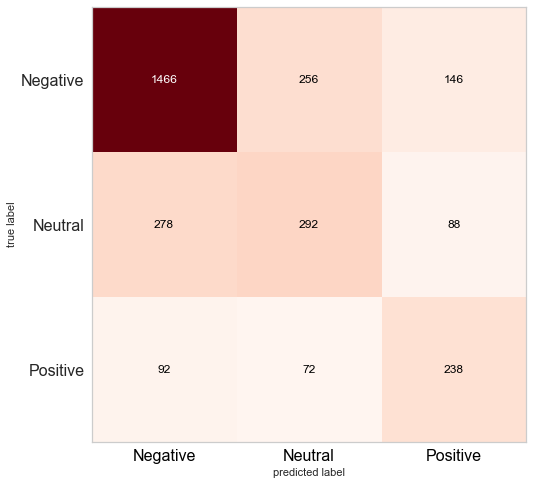

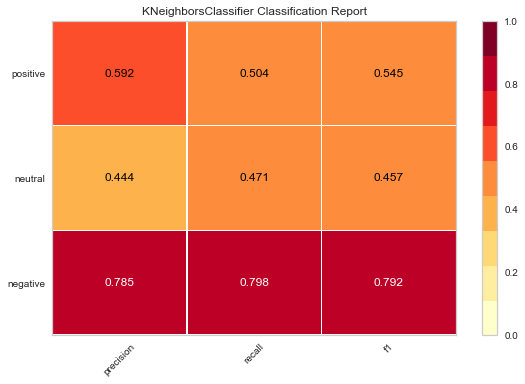

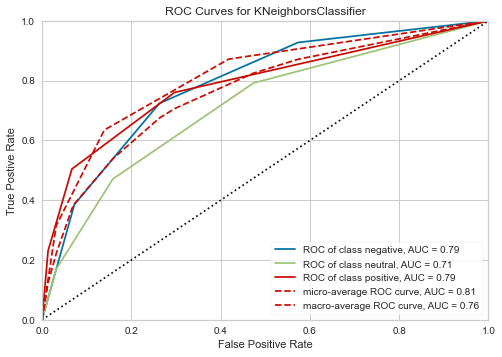

AdaBoostClassifier on cleaned lemma text with vectorizer: TfidfVectorizer
Accuracy of AdaBoostClassifier on cleaned lemma text with vectorizer: TfidfVectorizer is 0.7459016393442623
              precision    recall  f1-score   support

    negative       0.90      0.79      0.84      2073
     neutral       0.40      0.56      0.46       440
    positive       0.62      0.70      0.66       415

    accuracy                           0.75      2928
   macro avg       0.64      0.68      0.65      2928
weighted avg       0.78      0.75      0.76      2928



<Figure size 576x396 with 0 Axes>

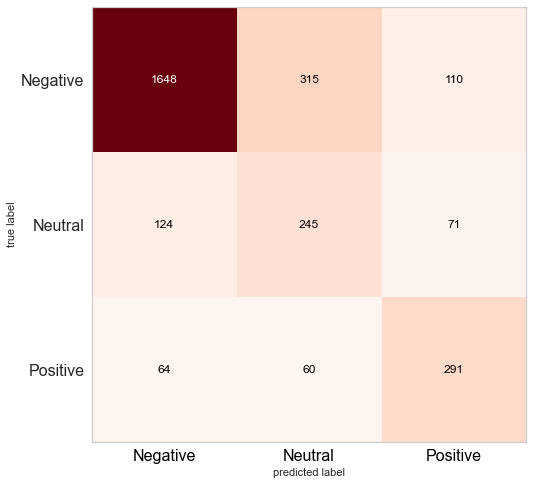

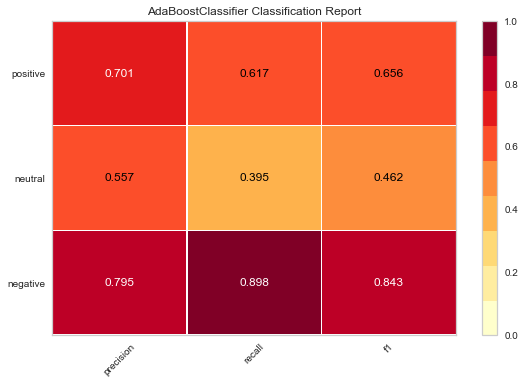

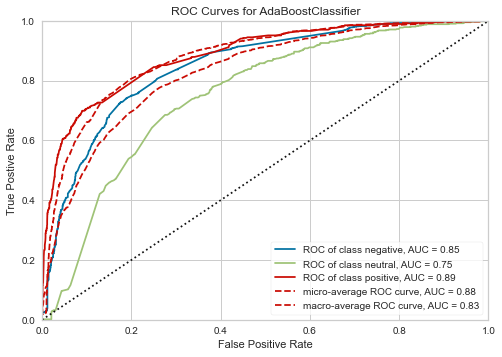

GaussianNB on cleaned lemma text with vectorizer: TfidfVectorizer
Accuracy of GaussianNB on cleaned lemma text with vectorizer: TfidfVectorizer is 0.4224726775956284
              precision    recall  f1-score   support

    negative       0.42      0.80      0.55       954
     neutral       0.28      0.27      0.28       626
    positive       0.64      0.22      0.33      1348

    accuracy                           0.42      2928
   macro avg       0.44      0.43      0.39      2928
weighted avg       0.49      0.42      0.39      2928



<Figure size 576x396 with 0 Axes>

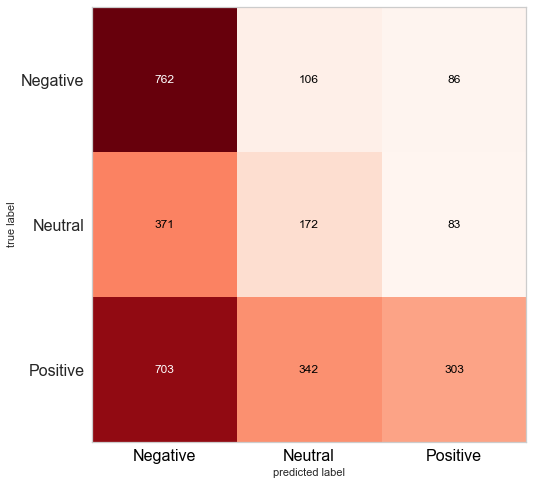

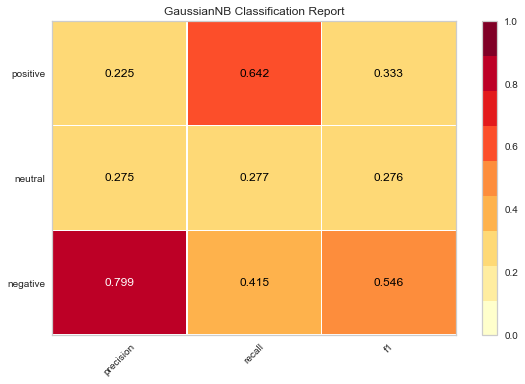

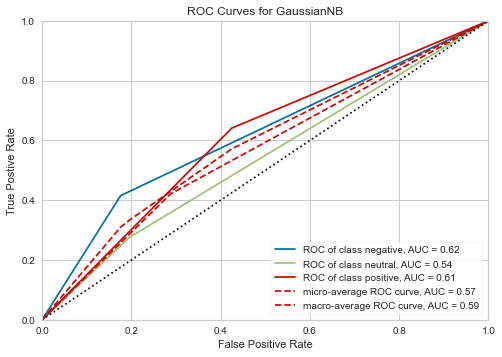

In [59]:
# Fit the DTM generated using 'lemma' cleaned corpus on both vectorizer

process_column('lemma')


In [60]:
# process_column('clean_tweet')


In [75]:
pd.set_option('display.max_rows', df_result_mod_train.shape[0]+1)

df_result_mod_train.sort_values(by='Accuracy', ascending=False, ignore_index=True)

Classifier processed_data       Vectorizer  Accuracy
0           LogisticRegression           stem  TfidfVectorizer  0.798839
1           LogisticRegression           stem  TfidfVectorizer  0.798839
2                          SVC           stem  CountVectorized  0.798156
3                          SVC           stem  CountVectorized  0.798156
4           LogisticRegression          lemma  TfidfVectorizer  0.797814
5           LogisticRegression          lemma  TfidfVectorizer  0.797814
6                          SVC          lemma  TfidfVectorizer  0.796790
7                          SVC          lemma  TfidfVectorizer  0.796790
8                          SVC           stem  TfidfVectorizer  0.796448
9                          SVC           stem  TfidfVectorizer  0.796448
10          LogisticRegression           stem  CountVectorized  0.796107
11          LogisticRegression           stem  CountVectorized  0.796107
12          LogisticRegression          lemma  CountVectorized  0.793716
13          LogisticRegression          lemma  CountVectorized  0.793716
14  GradientBoostingClassifier          lemma  CountVectorized  0.793716
15      RandomForestClassifier          lemma  CountVectorized  0.791325
16  GradientBoostingClassifier          lemma  TfidfVectorizer  0.791325
17  GradientBoostingClassifier           stem  CountVectorized  0.791325
18      RandomForestClassifier           stem  CountVectorized  0.790984
19  GradientBoostingClassifier          lemma  TfidfVectorizer  0.789959
20      RandomForestClassifier          lemma  CountVectorized  0.788934
21                         SVC          lemma  CountVectorized  0.788593
22                         SVC          lemma  CountVectorized  0.788593
23      RandomForestClassifier           stem  CountVectorized  0.788251
24  GradientBoostingClassifier          lemma  CountVectorized  0.787568
25  GradientBoostingClassifier           stem  TfidfVectorizer  0.786544
26  GradientBoostingClassifier           stem  TfidfVectorizer  0.785861
27  GradientBoostingClassifier           stem  CountVectorized  0.778347
28      RandomForestClassifier          lemma  TfidfVectorizer  0.774249
29      RandomForestClassifier           stem  TfidfVectorizer  0.774249
30      RandomForestClassifier           stem  TfidfVectorizer  0.773907
31      RandomForestClassifier          lemma  TfidfVectorizer  0.773566
32          AdaBoostClassifier          lemma  CountVectorized  0.751025
33          AdaBoostClassifier          lemma  CountVectorized  0.751025
34          AdaBoostClassifier           stem  CountVectorized  0.747951
35          AdaBoostClassifier           stem  CountVectorized  0.747951
36          AdaBoostClassifier          lemma  TfidfVectorizer  0.745902
37          AdaBoostClassifier          lemma  TfidfVectorizer  0.745902
38          AdaBoostClassifier           stem  TfidfVectorizer  0.744194
39          AdaBoostClassifier           stem  TfidfVectorizer  0.744194
40      DecisionTreeClassifier           stem  CountVectorized  0.722336
41      DecisionTreeClassifier           stem  CountVectorized  0.715505
42      DecisionTreeClassifier          lemma  CountVectorized  0.714139
43      DecisionTreeClassifier          lemma  CountVectorized  0.713798
44      DecisionTreeClassifier           stem  TfidfVectorizer  0.711066
45      DecisionTreeClassifier          lemma  TfidfVectorizer  0.707992
46      DecisionTreeClassifier           stem  TfidfVectorizer  0.702527
47      DecisionTreeClassifier          lemma  TfidfVectorizer  0.697063
48        KNeighborsClassifier          lemma  TfidfVectorizer  0.681694
49        KNeighborsClassifier          lemma  TfidfVectorizer  0.681694
50        KNeighborsClassifier           stem  TfidfVectorizer  0.680669
51        KNeighborsClassifier           stem  TfidfVectorizer  0.680669
52        KNeighborsClassifier          lemma  CountVectorized  0.573429
53        KNeighborsClassifier          lemma  CountVectorized  0.573429
54   

In [62]:
# process_column('text')


In [63]:
# Now we will use the 'CountVectorizer' with 'LGBMClassifier' 

In [64]:
# pip3 install lightgbm

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import CountVectorizer


twitter_sentiment = Pipeline([('CVec', CountVectorizer(CountVectorizer(stop_words='english'))),
                     ('Tfidf', TfidfTransformer()),
                      ('norm', Normalizer()),
                    ('tSVD', TruncatedSVD(n_components=100)),
                     ('lgb', LGBMClassifier(n_jobs=-1))])

In [66]:

from sklearn.model_selection import cross_validate

def run_cv(col):
    cv_pred = cross_validate(twitter_sentiment, 
                             df[col], 
                             df['airline_sentiment'], 
                             cv=5,
                             scoring=('roc_auc_ovr'))
    
    print ("Score on column '" , col, "' on each fold: ",  cv_pred['test_score'])

In [67]:
%%time

run_cv('clean_tweet')

Score on column ' clean_tweet ' on each fold:  [0.84187379 0.84457093 0.75922551 0.84933338 0.82863427]
CPU times: user 3min 7s, sys: 5.08 s, total: 3min 12s
Wall time: 14.4 s


In [68]:
%%time

run_cv('stem')

Score on column ' stem ' on each fold:  [0.84134305 0.8459789  0.77788313 0.86037053 0.83763769]
CPU times: user 7min 49s, sys: 19.1 s, total: 8min 8s
Wall time: 37.7 s


In [69]:
%%time

run_cv('lemma')

Score on column ' lemma ' on each fold:  [0.84126361 0.84736952 0.77338387 0.84953577 0.84737367]
CPU times: user 6min 1s, sys: 12 s, total: 6min 13s
Wall time: 29.1 s


In [70]:
# Using 

### Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset.<a class="anchor" id='6'></a>

In [76]:
df_result_mod_train.sort_values(by='Accuracy', ascending=False, ignore_index=True)

Classifier processed_data       Vectorizer  Accuracy
0           LogisticRegression           stem  TfidfVectorizer  0.798839
1           LogisticRegression           stem  TfidfVectorizer  0.798839
2                          SVC           stem  CountVectorized  0.798156
3                          SVC           stem  CountVectorized  0.798156
4           LogisticRegression          lemma  TfidfVectorizer  0.797814
5           LogisticRegression          lemma  TfidfVectorizer  0.797814
6                          SVC          lemma  TfidfVectorizer  0.796790
7                          SVC          lemma  TfidfVectorizer  0.796790
8                          SVC           stem  TfidfVectorizer  0.796448
9                          SVC           stem  TfidfVectorizer  0.796448
10          LogisticRegression           stem  CountVectorized  0.796107
11          LogisticRegression           stem  CountVectorized  0.796107
12          LogisticRegression          lemma  CountVectorized  0.793716
13          LogisticRegression          lemma  CountVectorized  0.793716
14  GradientBoostingClassifier          lemma  CountVectorized  0.793716
15      RandomForestClassifier          lemma  CountVectorized  0.791325
16  GradientBoostingClassifier          lemma  TfidfVectorizer  0.791325
17  GradientBoostingClassifier           stem  CountVectorized  0.791325
18      RandomForestClassifier           stem  CountVectorized  0.790984
19  GradientBoostingClassifier          lemma  TfidfVectorizer  0.789959
20      RandomForestClassifier          lemma  CountVectorized  0.788934
21                         SVC          lemma  CountVectorized  0.788593
22                         SVC          lemma  CountVectorized  0.788593
23      RandomForestClassifier           stem  CountVectorized  0.788251
24  GradientBoostingClassifier          lemma  CountVectorized  0.787568
25  GradientBoostingClassifier           stem  TfidfVectorizer  0.786544
26  GradientBoostingClassifier           stem  TfidfVectorizer  0.785861
27  GradientBoostingClassifier           stem  CountVectorized  0.778347
28      RandomForestClassifier          lemma  TfidfVectorizer  0.774249
29      RandomForestClassifier           stem  TfidfVectorizer  0.774249
30      RandomForestClassifier           stem  TfidfVectorizer  0.773907
31      RandomForestClassifier          lemma  TfidfVectorizer  0.773566
32          AdaBoostClassifier          lemma  CountVectorized  0.751025
33          AdaBoostClassifier          lemma  CountVectorized  0.751025
34          AdaBoostClassifier           stem  CountVectorized  0.747951
35          AdaBoostClassifier           stem  CountVectorized  0.747951
36          AdaBoostClassifier          lemma  TfidfVectorizer  0.745902
37          AdaBoostClassifier          lemma  TfidfVectorizer  0.745902
38          AdaBoostClassifier           stem  TfidfVectorizer  0.744194
39          AdaBoostClassifier           stem  TfidfVectorizer  0.744194
40      DecisionTreeClassifier           stem  CountVectorized  0.722336
41      DecisionTreeClassifier           stem  CountVectorized  0.715505
42      DecisionTreeClassifier          lemma  CountVectorized  0.714139
43      DecisionTreeClassifier          lemma  CountVectorized  0.713798
44      DecisionTreeClassifier           stem  TfidfVectorizer  0.711066
45      DecisionTreeClassifier          lemma  TfidfVectorizer  0.707992
46      DecisionTreeClassifier           stem  TfidfVectorizer  0.702527
47      DecisionTreeClassifier          lemma  TfidfVectorizer  0.697063
48        KNeighborsClassifier          lemma  TfidfVectorizer  0.681694
49        KNeighborsClassifier          lemma  TfidfVectorizer  0.681694
50        KNeighborsClassifier           stem  TfidfVectorizer  0.680669
51        KNeighborsClassifier           stem  TfidfVectorizer  0.680669
52        KNeighborsClassifier          lemma  CountVectorized  0.573429
53        KNeighborsClassifier          lemma  CountVectorized  0.573429
54   


### Analysis from EDA
* United, US Airways, American substantially get negative reactions.
* Tweets for Virgin America are the most balanced.
* Words like "Thanks", "best", "customer", "love", "flying", "good" are understandably present in the most frequent words of positive tweets.
* Customer Service Issue is the main neagtive reason for US Airways,United,American,Southwest,Virgin America
* Late Flight is the main negative reason for Delta
* Interestingly, Virgin America has the least count of negative reasons (all less than 60)
* Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons (Late flight, Customer Service Issue)
* Interestingly, American has a sudden upsurge in negative sentimental tweets on 2015-02-23, which reduced to half the very next day 2015-02-24. (I hope American is doing better these days and resolved their Customer Service Issue as we saw before)
* Virgin America has the least number of negative tweets throughout the weekly data that we have. It should be noted that the total number of tweets for Virgin America was also significantly less as compared to the rest airlines, and hence the least negative tweets.
* The negative tweets for all the rest airlines is slightly skewed towards the end of the week !
    
### Text pre-processing
* To preprocess your text simply means to bring your text into a form that is predictable and analyzable for your task. A task here is a combination of approach and domain. For example, extracting top keywords with TF-IDF (approach) from Tweets (domain) is an example of a Task.
#### Types of text preprocessing techniques for US Airlines sentiment analyzer
* Remove HTML/XML tags: This will remove all special tags that are specific to a programming language but not provide and information when the model is trained and analyzed. It will make the corpus with removed tags. Data can also be fetch from locations that have other tags and it is recommended to be removed.

* Tokenize using 'NLTK': Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization. As tokens are the building blocks of Natural Language, the most common way of processing the raw text happens at the token level.

* Replace contractions using 'contractions' library: This is to expend the contractions to separate words to allow consistency in the corpus

* Remove accented characters using unicodedata library: Certain languages have accented characters that will be inconsistent with the other text in the corpus. NLP pre-processing libraries allow remove the accented characters and convert the word to ascii or utf-8

* Remove special characters and digits using regex: It is also advisable to keep only displayable and language interpretable words to allow model to perform better. In this example, we also removed the digits since it was not helping to capture the sentiments.

* convert all letters to lowercase: A upper and lower case are 2 different characters and model/machine will treat it as a separate words. It is better to run all the words to either upper or lower case to minimize the features and also keep the same words, either upper or lower as a same feature. In many cases, text may keep all letters in a word uppercase to stress or emphasize the emotion. In the case of sentiment analysis, it may not be needed to collect all the BOLD letters and we turned all words to lowercase.

* Remove stopwords: Stop words are a set of commonly used words in a language. Examples of stop words in a language are “a”, “the”, “is”, “are” and etc. The intuition behind using stop words is that, by removing low information words from text, we can focus on the important words instead.

* Stemming: Stemming is the process of reducing inflection in words (e.g. troubled, troubles) to their root form (e.g. trouble). The “root” in this case may not be a real root word, but just a canonical form of the original word. By doing stemming, we are reducing the features and therefore avoiding curse of dimensionality without compromizing on the information.

* Lemmatization: Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form. The only difference is that, lemmatization tries to do it the proper way. It doesn’t just chop things off, it actually transforms words to the actual root.

### vectorizer
* Natural Language Processing allows us to convert the text we want to analyze and preprocess them into features to be put into our model.
* There are methods that can be used in the Natural Language Processing toolbox that can be used to preprocess our text: Count Vectorization and Term Frequency-Inverse Document Frequency.
* Count Vectorization involves counting the number of occurrences each words appears in a document (i.e distinct text such as an article, book, even a paragraph!).
* Knowing just when a word occurs in documents when they appear very frequently or infrequently across documents isn’t very helpful. But, whether a word appear frequently in some documents but less frequently in others can be really useful! This is where Term Frequency-Inverse Document Frequency (TF-IDF) comes in! The term frequency refers to how much a term (i.e. a word) appears in a document. Inverse document frequency refers to how common or rare a term appears in a document. If the TF-IDF score is pretty high, it means the words is pretty rare and is good at discriminating between documents.
* For this NLP, we have used both CountVectorizer and Tf-IDF and applied to the different Classifiers.
* The TF-IDF have provided less features and better results for most of the classifiers and there less resource intensive and more efficient in resource requirement and model performance. However, generating a DTM using TF-IDF may take a while compared to CountVector.

### Model Scores
* We ran multiple models and the best performer was 'LGBMClassifier' with almost 85% accuracy for 4 out of 5 folds and the worst was 77.8%. Other classifiers that were on the top of the list was LogisticClassifier, SVC that had the accuracy of almost 80% on both stem and lemma. 

We have the accuracy scores of all the models in the table with cleaned 'stem' and 'lemma' corpus.

Accuracy of LogisticRegression on cleaned stem text with vectorizer: CountVectorized is 0.7961065573770492
              precision    recall  f1-score   support

    negative       0.90      0.86      0.88      1909
     neutral       0.62      0.62      0.62       613
    positive       0.64      0.75      0.69       406

Accuracy of LogisticRegression on cleaned stem text with vectorizer: TfidfVectorizer is 0.7988387978142076
              precision    recall  f1-score   support

    negative       0.94      0.83      0.88      2065
     neutral       0.56      0.66      0.61       520
    positive       0.58      0.80      0.67       343

We also provided output of TP, TN, FP, FN against the multi-class sentiment output that can be then used to analyze the model's performance. The accuracy provides the overall efficiency of the model and the best performing models were Logistic, SVC and LGBMClassifier. With more text and tweets, we can improve the models performance further.
